# This dataset was imported from NYC taxi (url:https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)
# Data-directory: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf
# The dataset relates to taxi trips in NY, February 2016
 # But this dates are 
# 2016-01-03    [00:00:00 - 23:59:00]--> Tuesday
# 2016-02-03    [00:00:00 - 06:14:00] --> Wednesday
# 2016-10-03    [07:08:00 - 18:32:00] --> Thursday
# 2016-11-03    [00:00:00 - 14:19:00] --> Friday
# One line of Data represents Taxi Data
### What is PARQUET
### What is range of Lat Log of the Two Airports??
### Parallel vs Non-parallel computation time comparision
### How to do parallel computation, What libraries to import , how to implement
# Report: https://www.nyc.gov/site/tlc/about/industry-reports.page
### What is %%timeit Magic function??
### Data upload permissions on GPU -- linux

## Other Source : https://medium.com/analytics-vidhya/taxi-demand-prediction-on-time-series-data-with-holt-winter-forecasting-loss-0-02-2bcdeec48499

# Objective: How to reduce waiting time for potential customer 

# Identify all locations that have more than 10 pickups in 15 minutes slots

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [9]:
taxi_data=pd.read_csv(r"C:\Users\Sanjoy\Desktop\Bittu's File\SEM V\AI\uber_data.csv")

In [6]:
taxi_data.shape

(100000, 19)

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

# Check if total amount is equal to fare_amount + extra + mta_tax + tip_amount + toll_amount + Imp_sur 


In [6]:
taxi_data.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,01-03-2016 00:00,01-03-2016 00:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,01-03-2016 00:00,01-03-2016 00:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,01-03-2016 00:00,01-03-2016 00:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,01-03-2016 00:00,01-03-2016 00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,01-03-2016 00:00,01-03-2016 00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
5,2,01-03-2016 00:00,01-03-2016 00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,40.755787,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36
6,2,01-03-2016 00:00,01-03-2016 00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,0.000000,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30
7,1,01-03-2016 00:00,01-03-2016 00:16,1,6.20,-73.788773,40.647758,1,N,-73.829208,40.712345,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80
8,1,01-03-2016 00:00,01-03-2016 00:05,1,0.70,-73.958221,40.764641,1,N,-73.967896,40.762901,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80
9,2,01-03-2016 00:00,01-03-2016 00:24,3,7.18,-73.985779,40.741192,1,N,-73.946350,40.797878,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00


In [7]:
taxi_data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.88327,1.929170,3.034270,-73.288983,40.375220,1.040120,-73.312418,40.388064,1.337770,13.252608,0.101695,0.497000,1.872531,0.367415,0.299496,16.390721
std,0.32110,1.589408,3.846951,7.089652,3.901413,0.284238,6.964171,3.833974,0.481356,11.685574,0.202166,0.042673,2.618611,1.527758,0.016642,14.437180
min,1.00000,0.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-47.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-47.300000
25%,2.00000,1.000000,0.990000,-73.990959,40.738891,1.000000,-73.990547,40.738541,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.00000,1.000000,1.670000,-73.980202,40.755299,1.000000,-73.978416,40.755079,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.00000,2.000000,3.200000,-73.964203,40.769021,1.000000,-73.962090,40.767910,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,18.300000
max,2.00000,6.000000,184.400000,0.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000


In [8]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [9]:
desired_columns = [
    taxi_data.columns.get_loc('total_amount'),
    taxi_data.columns.get_loc('trip_distance'),
    taxi_data.columns.get_loc('tip_amount'),
    taxi_data.columns.get_loc('fare_amount'),
    taxi_data.columns.get_loc('tolls_amount'),
    taxi_data.columns.get_loc('extra'),
    taxi_data.columns.get_loc('mta_tax'),
    taxi_data.columns.get_loc('improvement_surcharge'),
    taxi_data.columns.get_loc('payment_type'),
    taxi_data.columns.get_loc('VendorID'),
    taxi_data.columns.get_loc('tpep_pickup_datetime'),
    taxi_data.columns.get_loc('tpep_dropoff_datetime'),
    taxi_data.columns.get_loc('pickup_longitude'),
    taxi_data.columns.get_loc('pickup_latitude'),
    taxi_data.columns.get_loc('RatecodeID'),
    taxi_data.columns.get_loc('store_and_fwd_flag'),
    taxi_data.columns.get_loc('dropoff_longitude'),
    taxi_data.columns.get_loc('dropoff_latitude'),
    taxi_data.columns.get_loc('passenger_count')
   
]

taxi_data_reordered = taxi_data.iloc[:, desired_columns]

In [10]:
taxi_data_reordered.head(10)

,total_amount,trip_distance,tip_amount,fare_amount,tolls_amount,extra,mta_tax,improvement_surcharge,payment_type,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,passenger_count
0,12.35,2.50,2.05,9.0,0.00,0.5,0.5,0.3,1,1,01-03-2016 00:00,01-03-2016 00:07,-73.976746,40.765152,1,N,-74.004265,40.746128,1
1,15.35,2.90,3.05,11.0,0.00,0.5,0.5,0.3,1,1,01-03-2016 00:00,01-03-2016 00:11,-73.983482,40.767925,1,N,-74.005943,40.733166,1
2,63.80,19.98,8.00,54.5,0.00,0.5,0.5,0.3,1,2,01-03-2016 00:00,01-03-2016 00:31,-73.782021,40.644810,1,N,-73.974541,40.675770,2
3,41.62,10.78,3.78,31.5,5.54,0.0,0.5,0.3,1,2,01-03-2016 00:00,01-03-2016 00:00,-73.863419,40.769814,1,N,-73.969650,40.757767,3
4,113.80,30.43,0.00,98.0,15.50,0.0,0.0,0.3,1,2,01-03-2016 00:00,01-03-2016 00:00,-73.971741,40.792183,3,N,-74.177170,40.695053,5
5,30.36,5.92,5.06,23.5,0.00,1.0,0.5,0.3,1,2,01-03-2016 00:00,01-03-2016 00:00,-74.017197,40.705383,1,N,-73.978073,40.755787,5
6,24.30,5.72,0.00,23.0,0.00,0.5,0.5,0.3,2,2,01-03-2016 00:00,01-03-2016 00:00,-73.994583,40.727848,1,N,0.000000,0.000000,6
7,21.80,6.20,0.00,20.5,0.00,0.5,0.5,0.3,3,1,01-03-2016 00:00,01-03-2016 00:16,-73.788773,40.647758,1,N,-73.829208,40.712345,1
8,8.80,0.70,2.00,5.5,0.00,0.5,0.5,0.3,1,1,01-03-2016 00:00,01-03-2016 00:05,-73.958221,40.764641,1,N,-73.967896,40.762901,1
9,28.00,7.18,3.20,23.5,0.00,0.5,0.5,0.3,1,2,01-03-2016 00:00,01-03-2016 00:24,-73.985779,40.741192,1,N,-73.946350,40.797878,3


<AxesSubplot:ylabel='Count'>

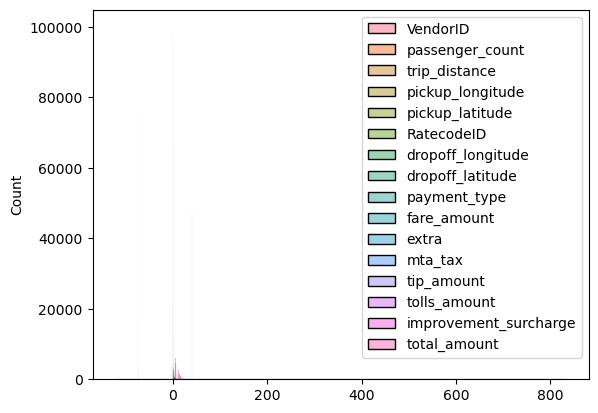

In [5]:
sns.histplot(taxi_data)

### Pass the Feature's number in iloc

<AxesSubplot:xlabel='VendorID', ylabel='Count'>

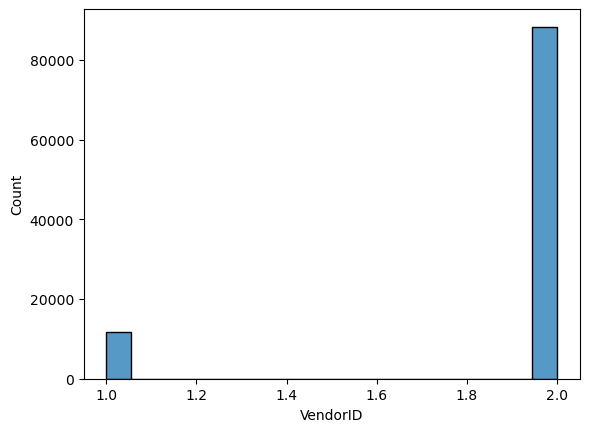

In [11]:
sns.histplot(taxi_data["VendorID"])
# Vendor-2 dominate 
# what is vendor ?

# Vendor-2 Dominant

plt.axis([-74.9,-73.5, 0,50000])  -74.1, -73.7

In [ ]:
# sns.histplot(data=taxi_data, x="pickup_longitude", y="pickup_latitude")
# plt.xlabel("Pickup Longitude")
# plt.ylabel("Pickup Latitude")
# sns.histplot(taxi_data["pickup_longitude"])
plt.hist(taxi_data["pickup_longitude"],bins = 100000);
plt.axis([-74.1,-73.7, 0,10000])
# plt.ylim(0,1000)
plt.show();

#### Logitude latitude , distance, What is 1 degree change in Latitude( How many meters/km ?) -- same longitude 
#### One degree of latitude is more or less equal to 111.12 kilometers (or 111,120 meters or 69 miles)
#### one degree of longitude is more or less 111.32 kilometers (or 111,320 meters).

In [12]:
0.005 * 111

0.555

In [ ]:
plt.hist(taxi_data["pickup_longitude"],bins = 100000);
plt.axis([-74.07,-73.93, 0,10000])
plt.show();

In [4]:
mean_pickup_longitude = taxi_data["pickup_longitude"].mean()
mean_pickup_longitude

-73.28898292891198

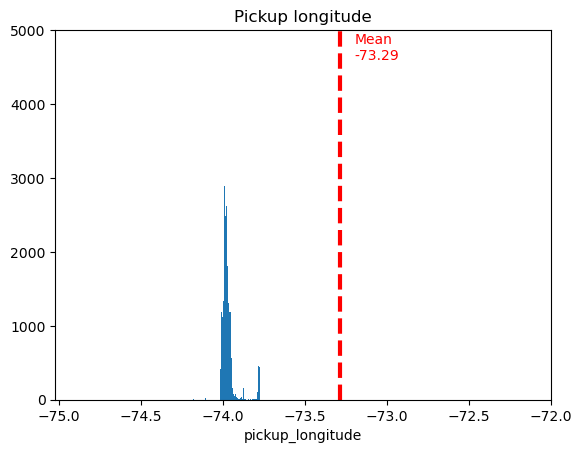

In [4]:
plt.hist(taxi_data["pickup_longitude"], bins=100000)

plt.axvline(x=taxi_data["pickup_longitude"].mean(), color="red", linestyle="--", linewidth=3.0)
mean_value = round(taxi_data["pickup_longitude"].mean(), 2)

plt.text(s=f'Mean\n{mean_value}', x= -73.2, y=4600, size=10, color='red')
plt.axis([-75.02, -72.0, 0, 5000])

plt.xlabel("pickup_longitude")
plt.title("Pickup longitude")
plt.show()


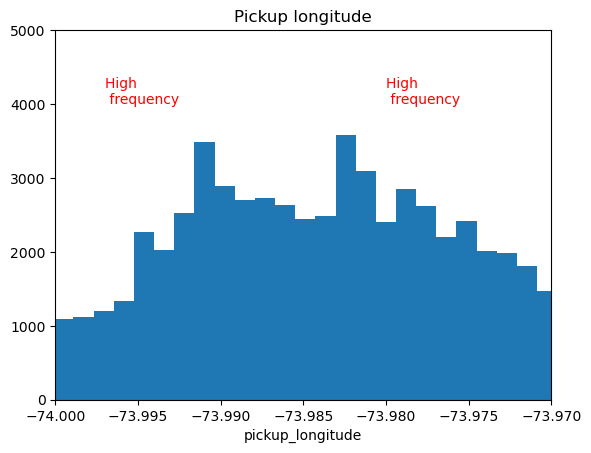

In [19]:
plt.hist(taxi_data["pickup_longitude"],bins = 100000);
plt.axis([-74.00,-73.97, 0,5000])
plt.text(s=f'High \n frequency', x= -73.990, y=3600, size=10, color='red')
plt.text(s=f'High \n frequency', x= -73.983, y=4000, size=10, color='red')
plt.title("Pickup longitude")
plt.xlabel("pickup_longitude")
plt.show();

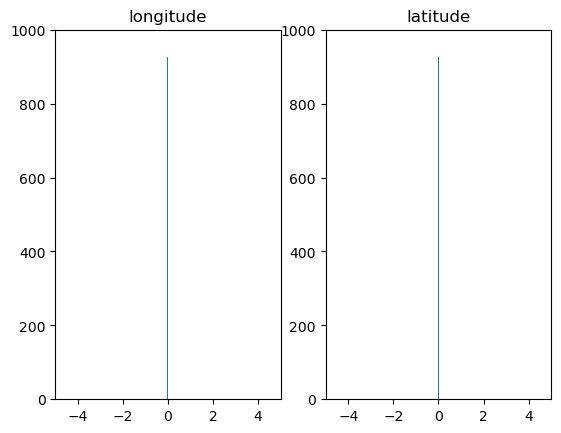

In [14]:
plt.subplot(1,2,1)
plt.hist(taxi_data["pickup_longitude"],bins = 5000);
plt.axis([-5,5, 0,1000])
plt.title("longitude")
# plt.show()

plt.subplot(1,2,2)
plt.hist(taxi_data["pickup_latitude"],bins = 5000);
plt.axis([-5,5, 0,1000])
plt.title("latitude")
plt.show();

In [15]:
sum(taxi_data.pickup_latitude==taxi_data.pickup_longitude)

925

In [5]:
target_longitude = -73.9903717
matching_rows = taxi_data[taxi_data['pickup_longitude'] == target_longitude]

In [6]:
matching_pickup_latitude = matching_rows['pickup_latitude']

print("Matching pickup latitude:")
print(matching_pickup_latitude)

Matching pickup latitude:
2982     40.756046
6424     40.751629
6713     40.756248
14244    40.750999
15019    40.756748
18931    40.746216
25322    40.746922
28113    40.750927
32873    40.745663
36121    40.714481
37396    40.731499
42118    40.756222
42588    40.728970
51044    40.756092
54833    40.756691
56213    40.730938
60558    40.740505
71289    40.714436
73024    40.725052
74314    40.731354
79804    40.686600
90512    40.756268
90739    40.756489
90893    40.756187
91180    40.756248
91278    40.756126
92836    40.755966
Name: pickup_latitude, dtype: float64


In [7]:
matching_row_nos = matching_pickup_latitude.index

In [ ]:
 np.hstack(dir(matching_pickup_latitude))
# type(pickup_latitudes)

# Initial Observation
## Latitude:40.756046,Longitude:-73.9903717--> 265 W 40th St, New York, NY  10036, United States 

In [8]:
row_indices = [2982, 6424, 6713, 14244, 15019, 18931, 25322, 28113, 32873, 36121,
               37396, 42118, 42588, 51044, 54833, 56213, 60558, 71289, 73024,
               74314, 79804, 90512, 90739, 90893, 91180, 91278, 92836]

selected_rows = taxi_data.loc[row_indices]

print("Selected rows:")
print(selected_rows)

Selected rows:
       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2982          2     10-03-2016 07:24      10-03-2016 07:36                1   
6424          2     10-03-2016 07:43      10-03-2016 07:49                1   
6713          2     10-03-2016 07:45      10-03-2016 07:52                2   
14244         2     10-03-2016 08:22      10-03-2016 08:34                1   
15019         2     10-03-2016 08:26      10-03-2016 08:37                1   
18931         2     10-03-2016 08:47      10-03-2016 09:06                2   
25322         2     10-03-2016 09:20      10-03-2016 09:29                1   
28113         2     10-03-2016 09:36      10-03-2016 09:40                1   
32873         2     10-03-2016 10:04      10-03-2016 10:09                5   
36121         2     10-03-2016 10:24      10-03-2016 10:36                1   
37396         2     10-03-2016 10:32      10-03-2016 10:49                1   
42118         2     10-03-2016 11:02 

# Using iloc Rearrange variablesin this order: Total_amount, Trip_distance,

# Histrograms of total_amount, fare_amount, trip_distance, tip_amount, toll_amount(bar-plot-toll: 0/non-zero). Histrogram of Non-zero toll_amounts(Mean). 

# Scatter Plot With Histogram For
## pickup_lat, long ;  drop_off lat,long

## insert plt text (10,-20) -> Null 

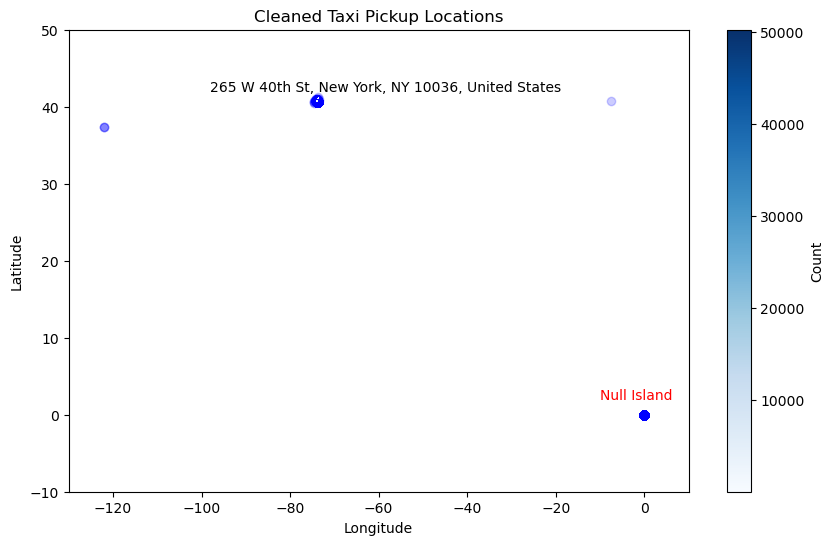

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(taxi_data['pickup_longitude'], taxi_data['pickup_latitude'], alpha=0.2, label='Pickup', color='b')


plt.hist2d(taxi_data['pickup_longitude'], taxi_data['pickup_latitude'], bins=(1000, 1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count')
plt.text(s=f'Null Island', x=-10, y=2, size=10, color='red')
plt.text(s=f'265 W 40th St, New York, NY 10036, United States', x=-98, y=42, size=10, color='black')


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cleaned Taxi Pickup Locations')
plt.axis([-130,10,-10,50])
plt.show()

## remove 
### Null Island is the location at zero degrees latitude and zero degrees longitude ( 0°N 0°E), i.e., where the prime meridian and the equator intersect. Since there is no landmass located at these coordinates, it is not an actual island

###  40 latitude and zero degrees longitude---> Spain     


In [21]:
# Assuming you have a DataFrame named 'taxi_data'
cleaned_pickup_data = taxi_data[(taxi_data['pickup_longitude'] != 0) & (taxi_data['pickup_latitude'] != 0)]

In [22]:
cleaned_pickup_data.shape

(99075, 19)

In [23]:
removed_count = taxi_data.shape[0] - cleaned_pickup_data.shape[0]
print(f"Number of removed data points: {removed_count}")

Number of removed data points: 925


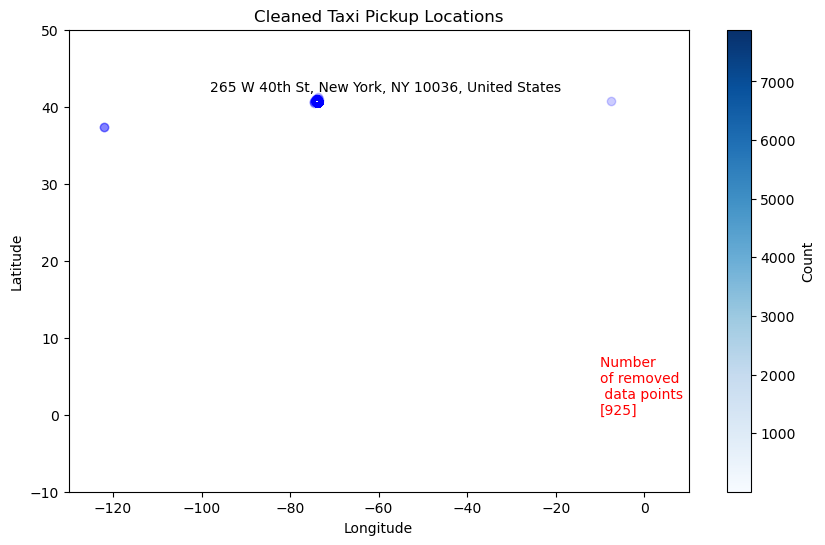

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_pickup_data['pickup_longitude'], cleaned_pickup_data['pickup_latitude'], alpha=0.2, label='Pickup', color='b')


plt.hist2d(cleaned_pickup_data['pickup_longitude'], cleaned_pickup_data['pickup_latitude'], bins=(1000, 1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count')
plt.text(s=f'Number \nof removed\n data points\n({removed_count})', x=-10, y=0, size=10, color='red')
plt.text(s=f'265 W 40th St, New York, NY 10036, United States', x=-98, y=42, size=10, color='black')



plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cleaned Taxi Pickup Locations')
plt.axis([-130,10,-10,50])
plt.show()

# place two plots before after change sideby side & Count of how many (0,0) locations are removed 

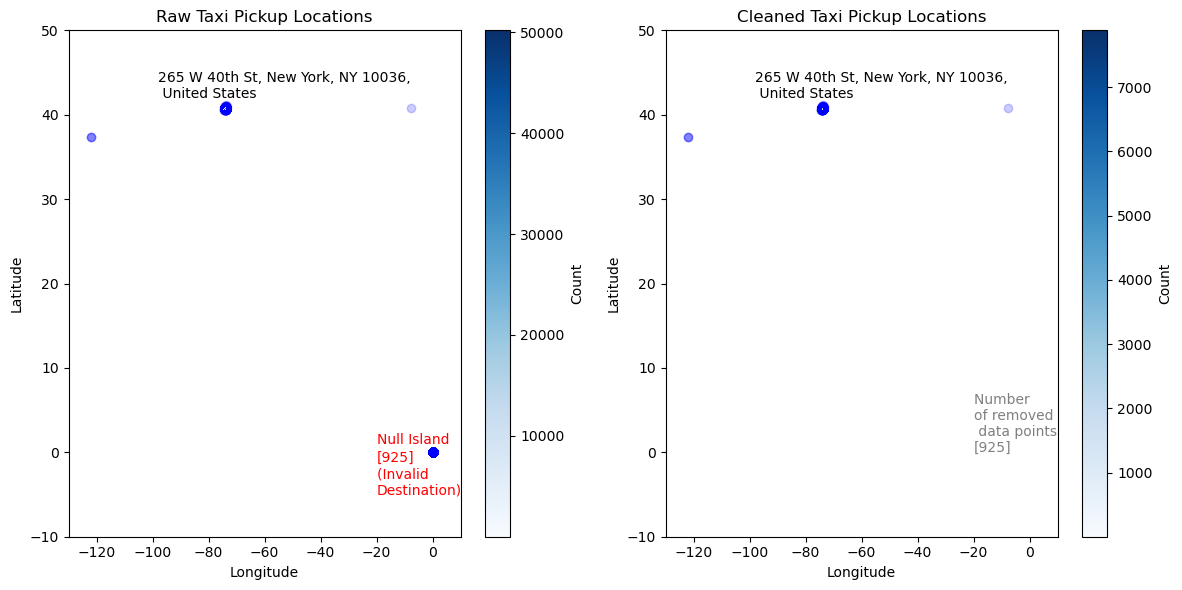

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  

plt.subplot(1, 2, 1)
plt.scatter(
    taxi_data['pickup_longitude'],
    taxi_data['pickup_latitude'],
    alpha=0.2,
    label='Pickup',
    color='b'
)
plt.hist2d(
    taxi_data['pickup_longitude'],
    taxi_data['pickup_latitude'],
    bins=(1000, 1000),
    cmap='Blues',
    cmin=1
)
plt.colorbar(label='Count')
plt.text(
    s=f'Null Island',
    x=-20,
    y=1,
    size=10,
    color='red'
)
plt.text(
    s=f'({removed_count})\n Invalid \nDestination',
    x=-20,
    y=-5,
    size=10,
    color='red'
)
plt.text(
    s='265 W 40th St, New York, NY 10036,\n United States',
    x=-98,
    y=42,
    size=10,
    color='black'
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Raw Taxi Pickup Locations')
plt.axis([-130, 10, -10, 50])


plt.subplot(1, 2, 2)
plt.scatter(
    cleaned_pickup_data['pickup_longitude'],
    cleaned_pickup_data['pickup_latitude'],
    alpha=0.2,
    label='Pickup',
    color='b'
)
plt.hist2d(
    cleaned_pickup_data['pickup_longitude'],
    cleaned_pickup_data['pickup_latitude'],
    bins=(1000, 1000),
    cmap='Blues',
    cmin=1
)
plt.colorbar(label='Count')
plt.text(
    s=f'Number \nof removed\n data points\n({removed_count})',
    x=-20,
    y=0,
    size=10,
    color='gray'
)
plt.text(
    s='265 W 40th St, New York, NY 10036,\n United States',
    x=-98,
    y=42,
    size=10,
    color='black'
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cleaned Taxi Pickup Locations')
plt.axis([-130, 10, -10, 50])

plt.tight_layout() 
plt.show()


In [20]:
import plotly.express as px
import pandas as pd

fig = px.scatter(
    cleaned_pickup_data, 
    x='pickup_longitude', 
    y='pickup_latitude',
    title="Scatterplot of Valid Pickup Locations",
    labels={'pickup_longitude': 'Longitude', 'pickup_latitude': 'Latitude'},
    template="plotly"
)
fig.show()

NameError: name 'cleaned_pickup_data' is not defined

In [24]:
x = cleaned_pickup_data['pickup_longitude']
y = cleaned_pickup_data['pickup_latitude']


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

#     bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=100)
    ax_histy.hist(y, bins=100, orientation='horizontal')

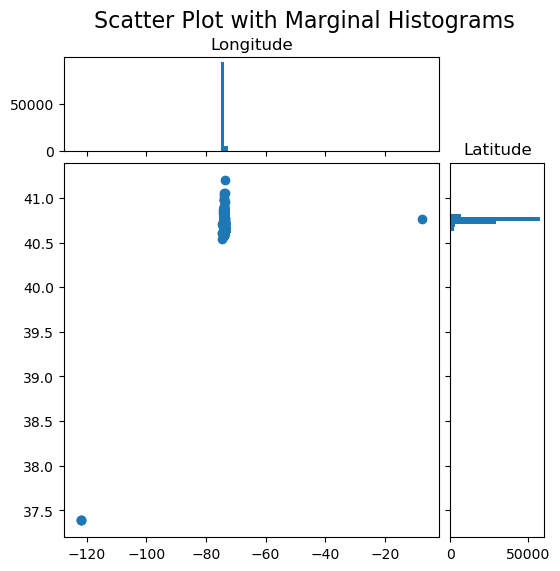

In [27]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.set_title('Longitude')  # Label for the x-axis histogram
ax_histy.set_title('Latitude')   # Label for the y-axis histogram
# Draw the scatter plot and marginals.
fig.suptitle('Scatter Plot with Marginal Histograms', fontsize=16)
scatter_hist(x, y, ax, ax_histx, ax_histy)

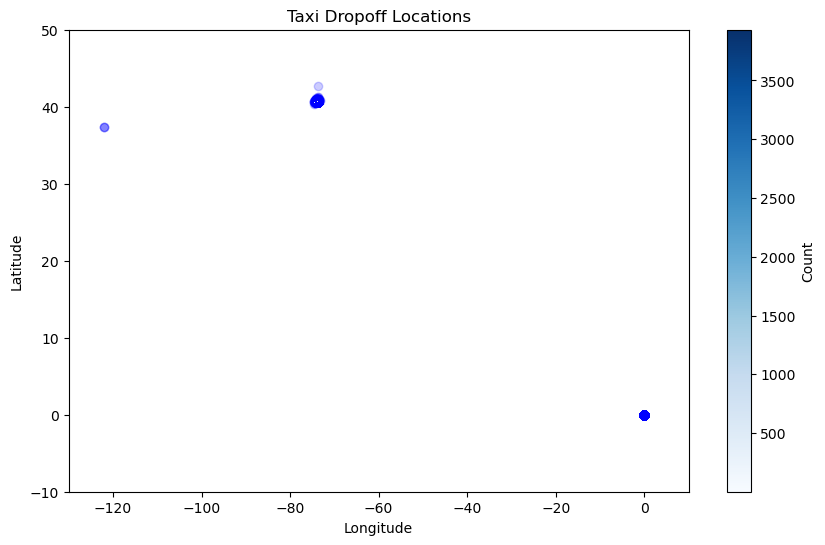

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(taxi_data['dropoff_longitude'], taxi_data['dropoff_latitude'], alpha=0.2, label='Dropoff', color='b')


plt.hist2d(taxi_data['dropoff_longitude'], taxi_data['dropoff_latitude'], bins=(10000,10000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Taxi Dropoff Locations')
plt.axis([-130,10,-10,50])
plt.show()

In [9]:
cleaned_dropoff_data = taxi_data[(taxi_data['dropoff_longitude'] != 0) & (taxi_data['dropoff_latitude'] != 0)]

In [10]:
cleaned_dropoff_data.shape

(99107, 19)

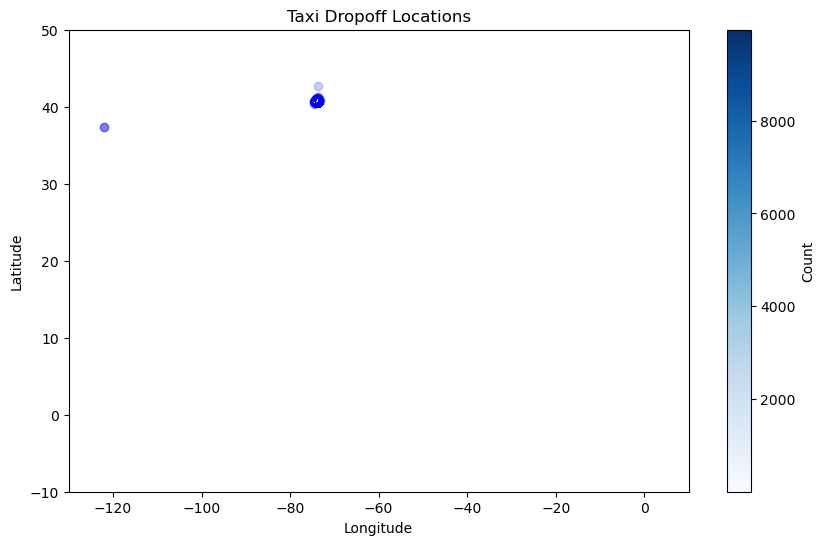

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_dropoff_data['dropoff_longitude'], cleaned_dropoff_data['dropoff_latitude'], alpha=0.2, label='Dropoff', color='b')


plt.hist2d(cleaned_dropoff_data['dropoff_longitude'], cleaned_dropoff_data['dropoff_latitude'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Taxi Dropoff Locations')
plt.axis([-130,10,-10,50])
plt.show()

In [ ]:
fig = px.scatter(
    cleaned_dropoff_data, 
    x='dropoff_longitude', 
    y='dropoff_latitude',
    title="Scatterplot of Valid Dropoff Locations",
    labels={'dropoff_longitude': 'Longitude', 'dropoff_latitude': 'Latitude'},
    template="plotly"
)
fig.show()

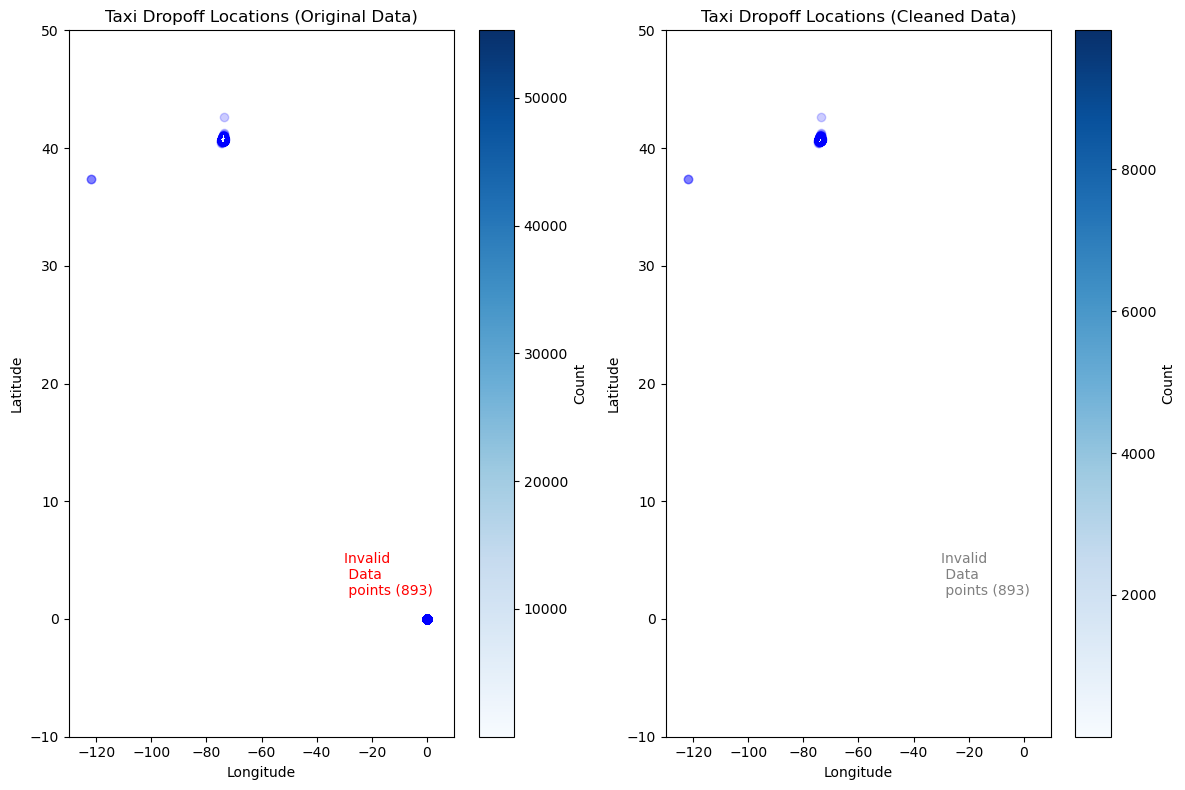

In [26]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.scatter(taxi_data['dropoff_longitude'], taxi_data['dropoff_latitude'], alpha=0.2, label='Dropoff', color='b')
plt.hist2d(taxi_data['dropoff_longitude'], taxi_data['dropoff_latitude'], bins=(1000, 1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Taxi Dropoff Locations (Original Data)')
plt.text(-30, 2, 'Invalid \n Data\n points (893)', size=10, color='red')
plt.axis([-130, 10, -10, 50])


plt.subplot(1, 2, 2)
plt.scatter(cleaned_dropoff_data['dropoff_longitude'], cleaned_dropoff_data['dropoff_latitude'], alpha=0.2, label='Dropoff', color='b')
plt.hist2d(cleaned_dropoff_data['dropoff_longitude'], cleaned_dropoff_data['dropoff_latitude'], bins=(1000, 1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Taxi Dropoff Locations (Cleaned Data)')
plt.text(-30, 2, 'Invalid \n Data\n points (893)', size=10, color='gray')
plt.axis([-130, 10, -10, 50])

plt.tight_layout()
plt.show()


In [13]:
100000-99107

893

## A sizable number of rows show zero lat, long as dropoff location. This need to be investigated.

In [4]:
zero_lat_long_rows = taxi_data[(taxi_data['pickup_longitude'] == 0) & (taxi_data['pickup_latitude'] == 0)]
valid_taxi_data = taxi_data[(taxi_data['pickup_longitude'] != 0) | (taxi_data['pickup_latitude'] != 0)]
# print("Removed data points:")
# print(zero_lat_long_rows)


In [5]:
zero_lat_long_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
116,2,01-03-2016 00:00,01-03-2016 00:11,1,2.91,0.0,0.0,1,N,0.000000,0.000000,1,12.0,0.5,0.5,3.32,0.00,0.3,16.62
365,2,10-03-2016 07:08,10-03-2016 07:32,2,8.81,0.0,0.0,1,N,0.000000,0.000000,1,28.0,0.0,0.5,10.30,5.54,0.3,44.64
434,2,10-03-2016 07:08,10-03-2016 07:09,6,0.02,0.0,0.0,1,N,-73.972359,40.794121,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30
478,2,10-03-2016 07:09,10-03-2016 07:40,1,18.05,0.0,0.0,3,N,0.000000,0.000000,1,66.0,0.0,0.0,16.36,15.50,0.3,98.16
491,2,10-03-2016 07:09,10-03-2016 07:17,5,1.73,0.0,0.0,1,N,0.000000,0.000000,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99620,2,10-03-2016 14:27,10-03-2016 14:30,1,0.53,0.0,0.0,1,N,0.000000,0.000000,2,4.0,0.0,0.5,0.00,0.00,0.3,4.80
99641,1,01-03-2016 06:14,01-03-2016 06:18,1,0.80,0.0,0.0,1,N,-73.980827,40.760719,1,5.5,0.0,0.5,1.00,0.00,0.3,7.30
99653,1,01-03-2016 06:14,01-03-2016 07:02,1,18.20,0.0,0.0,2,N,0.000000,0.000000,1,52.0,0.0,0.5,10.00,5.54,0.3,68.34
99655,1,01-03-2016 06:14,01-03-2016 06:21,1,2.60,0.0,0.0,1,N,0.000000,0.000000,2,9.5,0.0,0.5,0.00,0.00,0.3,10.30


In [6]:
np.vstack(zero_lat_long_rows.columns)


array([['VendorID'],
       ['tpep_pickup_datetime'],
       ['tpep_dropoff_datetime'],
       ['passenger_count'],
       ['trip_distance'],
       ['pickup_longitude'],
       ['pickup_latitude'],
       ['RatecodeID'],
       ['store_and_fwd_flag'],
       ['dropoff_longitude'],
       ['dropoff_latitude'],
       ['payment_type'],
       ['fare_amount'],
       ['extra'],
       ['mta_tax'],
       ['tip_amount'],
       ['tolls_amount'],
       ['improvement_surcharge'],
       ['total_amount']], dtype='<U21')

In [7]:
zero_lat_long_rows.iloc[:,[3,4,12,5,6,9,10]]

,passenger_count,trip_distance,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
116,1,2.91,12.0,0.0,0.0,0.000000,0.000000
365,2,8.81,28.0,0.0,0.0,0.000000,0.000000
434,6,0.02,2.5,0.0,0.0,-73.972359,40.794121
478,1,18.05,66.0,0.0,0.0,0.000000,0.000000
491,5,1.73,8.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
99620,1,0.53,4.0,0.0,0.0,0.000000,0.000000
99641,1,0.80,5.5,0.0,0.0,-73.980827,40.760719
99653,1,18.20,52.0,0.0,0.0,0.000000,0.000000
99655,1,2.60,9.5,0.0,0.0,0.000000,0.000000


In [8]:
zero_lat_long_rows.iloc[:,[3,4,12,5,6,9,10]].describe()

,passenger_count,trip_distance,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,925.000000,925.000000,925.000000,925.0,925.0,925.000000,925.000000
mean,1.878919,2.431405,15.161849,0.0,0.0,-8.554540,4.713933
std,1.559928,3.300437,17.893160,0.0,0.0,23.665559,13.040781
min,0.000000,0.000000,-2.500000,0.0,0.0,-74.641724,0.000000
25%,1.000000,0.590000,5.500000,0.0,0.0,0.000000,0.000000
50%,1.000000,1.280000,9.500000,0.0,0.0,0.000000,0.000000
75%,2.000000,2.930000,17.000000,0.0,0.0,0.000000,0.000000
max,6.000000,21.920000,170.000000,0.0,0.0,0.000000,40.893360


<AxesSubplot:ylabel='Count'>

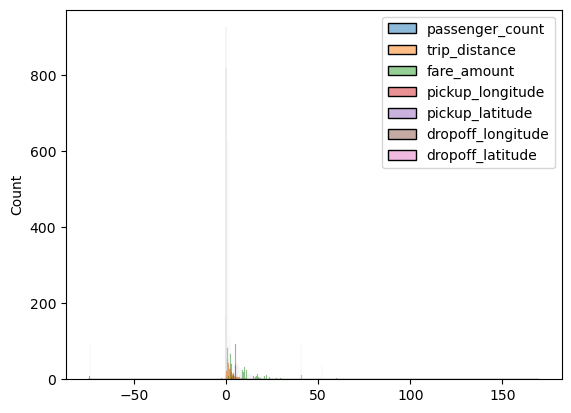

In [64]:
sns.histplot(zero_lat_long_rows.iloc[:,[3,4,12,5,6,9,10]])

Text(0.5, 1.0, 'Passenger Count')

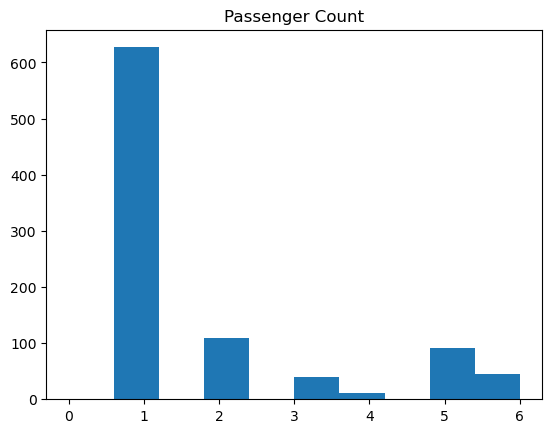

In [66]:
plt.hist(zero_lat_long_rows.iloc[:,[3]])
plt.title("Passenger Count")

Text(0.5, 1.0, 'Trip Distance')

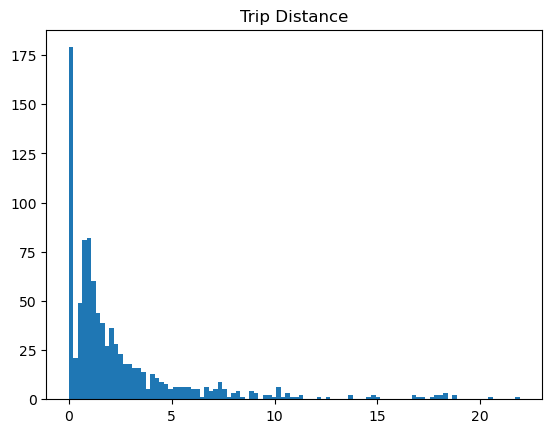

In [10]:
count,bins,hist_fig =plt.hist(zero_lat_long_rows.iloc[:,[4]],bins = 100)
# plt.ylim(30)
plt.title("Trip Distance")

In [102]:
# np.hstack(dir(zero_lat_long_rows.iloc[:,[4]]))
set((zero_lat_long_rows.iloc[:,[4]]).__array__)

TypeError: 'method' object is not iterable

In [11]:
bins.shape
low_bins = bins[:-1]
low_bins

array([ 0.    ,  0.2192,  0.4384,  0.6576,  0.8768,  1.096 ,  1.3152,
        1.5344,  1.7536,  1.9728,  2.192 ,  2.4112,  2.6304,  2.8496,
        3.0688,  3.288 ,  3.5072,  3.7264,  3.9456,  4.1648,  4.384 ,
        4.6032,  4.8224,  5.0416,  5.2608,  5.48  ,  5.6992,  5.9184,
        6.1376,  6.3568,  6.576 ,  6.7952,  7.0144,  7.2336,  7.4528,
        7.672 ,  7.8912,  8.1104,  8.3296,  8.5488,  8.768 ,  8.9872,
        9.2064,  9.4256,  9.6448,  9.864 , 10.0832, 10.3024, 10.5216,
       10.7408, 10.96  , 11.1792, 11.3984, 11.6176, 11.8368, 12.056 ,
       12.2752, 12.4944, 12.7136, 12.9328, 13.152 , 13.3712, 13.5904,
       13.8096, 14.0288, 14.248 , 14.4672, 14.6864, 14.9056, 15.1248,
       15.344 , 15.5632, 15.7824, 16.0016, 16.2208, 16.44  , 16.6592,
       16.8784, 17.0976, 17.3168, 17.536 , 17.7552, 17.9744, 18.1936,
       18.4128, 18.632 , 18.8512, 19.0704, 19.2896, 19.5088, 19.728 ,
       19.9472, 20.1664, 20.3856, 20.6048, 20.824 , 21.0432, 21.2624,
       21.4816, 21.7

In [12]:
up_bins = bins[1:]
up_bins

array([ 0.2192,  0.4384,  0.6576,  0.8768,  1.096 ,  1.3152,  1.5344,
        1.7536,  1.9728,  2.192 ,  2.4112,  2.6304,  2.8496,  3.0688,
        3.288 ,  3.5072,  3.7264,  3.9456,  4.1648,  4.384 ,  4.6032,
        4.8224,  5.0416,  5.2608,  5.48  ,  5.6992,  5.9184,  6.1376,
        6.3568,  6.576 ,  6.7952,  7.0144,  7.2336,  7.4528,  7.672 ,
        7.8912,  8.1104,  8.3296,  8.5488,  8.768 ,  8.9872,  9.2064,
        9.4256,  9.6448,  9.864 , 10.0832, 10.3024, 10.5216, 10.7408,
       10.96  , 11.1792, 11.3984, 11.6176, 11.8368, 12.056 , 12.2752,
       12.4944, 12.7136, 12.9328, 13.152 , 13.3712, 13.5904, 13.8096,
       14.0288, 14.248 , 14.4672, 14.6864, 14.9056, 15.1248, 15.344 ,
       15.5632, 15.7824, 16.0016, 16.2208, 16.44  , 16.6592, 16.8784,
       17.0976, 17.3168, 17.536 , 17.7552, 17.9744, 18.1936, 18.4128,
       18.632 , 18.8512, 19.0704, 19.2896, 19.5088, 19.728 , 19.9472,
       20.1664, 20.3856, 20.6048, 20.824 , 21.0432, 21.2624, 21.4816,
       21.7008, 21.9

In [13]:
bins

array([ 0.    ,  0.2192,  0.4384,  0.6576,  0.8768,  1.096 ,  1.3152,
        1.5344,  1.7536,  1.9728,  2.192 ,  2.4112,  2.6304,  2.8496,
        3.0688,  3.288 ,  3.5072,  3.7264,  3.9456,  4.1648,  4.384 ,
        4.6032,  4.8224,  5.0416,  5.2608,  5.48  ,  5.6992,  5.9184,
        6.1376,  6.3568,  6.576 ,  6.7952,  7.0144,  7.2336,  7.4528,
        7.672 ,  7.8912,  8.1104,  8.3296,  8.5488,  8.768 ,  8.9872,
        9.2064,  9.4256,  9.6448,  9.864 , 10.0832, 10.3024, 10.5216,
       10.7408, 10.96  , 11.1792, 11.3984, 11.6176, 11.8368, 12.056 ,
       12.2752, 12.4944, 12.7136, 12.9328, 13.152 , 13.3712, 13.5904,
       13.8096, 14.0288, 14.248 , 14.4672, 14.6864, 14.9056, 15.1248,
       15.344 , 15.5632, 15.7824, 16.0016, 16.2208, 16.44  , 16.6592,
       16.8784, 17.0976, 17.3168, 17.536 , 17.7552, 17.9744, 18.1936,
       18.4128, 18.632 , 18.8512, 19.0704, 19.2896, 19.5088, 19.728 ,
       19.9472, 20.1664, 20.3856, 20.6048, 20.824 , 21.0432, 21.2624,
       21.4816, 21.7

In [15]:
dist_df=pd.Series({
        'low_bins': low_bins,
        'up_bins': up_bins,
        'count': count})
pd.DataFrame(dist_df).T

,low_bins,up_bins,count
0,"[0.0, 0.2192, 0.4384, 0.6576, 0.8768, 1.096, 1...","[0.2192, 0.4384, 0.6576, 0.8768, 1.096, 1.3152...","[179.0, 21.0, 49.0, 81.0, 82.0, 60.0, 44.0, 39..."


In [125]:
type(dist_df)

dict

## How to show class interval and Count from plt.hist output

Class Interval: [-3.32, -2.66) - Count: 2
Class Interval: [-2.66, -2.00) - Count: 20
Class Interval: [-2.00, -1.34) - Count: 59
Class Interval: [-1.34, -0.68) - Count: 145
Class Interval: [-0.68, -0.02) - Count: 249
Class Interval: [-0.02, 0.64) - Count: 259
Class Interval: [0.64, 1.30) - Count: 163
Class Interval: [1.30, 1.95) - Count: 79
Class Interval: [1.95, 2.61) - Count: 21
Class Interval: [2.61, 3.27) - Count: 3


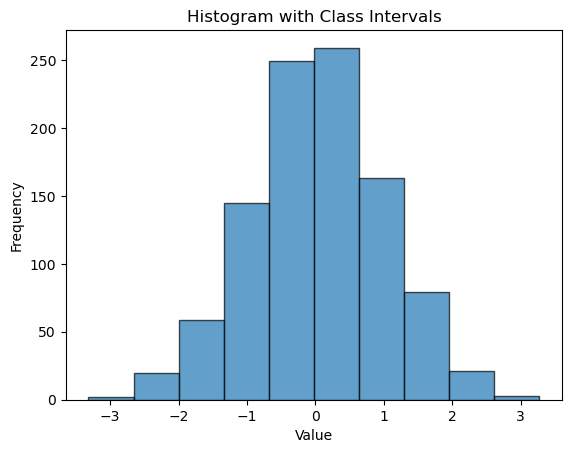

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.randn(1000)  # 1000 random points from a normal distribution

# Create a histogram and get the outputs
n, bins, patches = plt.hist(data, bins=10, edgecolor='black', alpha=0.7)

# Print class intervals and counts
for i in range(len(bins) - 1):
    print(f"Class Interval: [{bins[i]:.2f}, {bins[i+1]:.2f}) - Count: {int(n[i])}")

# Display the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Class Intervals')
plt.show()


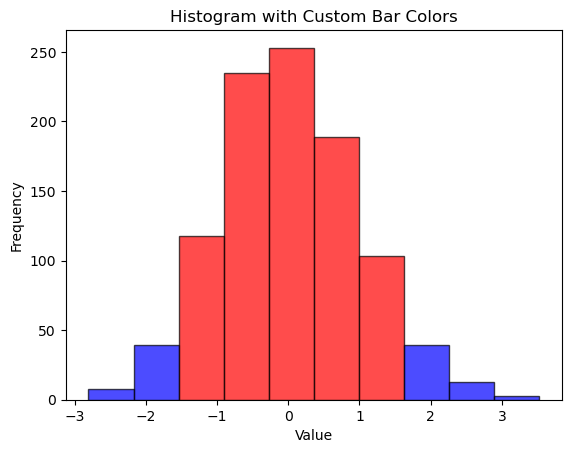

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.randn(1000)  # 1000 random points from a normal distribution

# Create a histogram and get patches
n, bins, patches = plt.hist(data, bins=10, edgecolor='black', alpha=0.7)

# Change the color of the bars dynamically
for i, patch in enumerate(patches):
    if n[i] > 50:  # Example condition: highlight bins with counts > 50
        patch.set_facecolor('red')  # Set bar color to red
    else:
        patch.set_facecolor('blue')  # Set bar color to blue

# Display the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Custom Bar Colors')
plt.show()


In [18]:
count

array([179.,  21.,  49.,  81.,  82.,  60.,  44.,  39.,  27.,  36.,  28.,
        23.,  18.,  18.,  16.,  16.,  14.,   5.,  13.,  11.,   9.,   8.,
         5.,   6.,   6.,   6.,   6.,   5.,   5.,   1.,   6.,   4.,   5.,
         9.,   5.,   1.,   3.,   4.,   1.,   0.,   4.,   3.,   0.,   2.,
         2.,   1.,   6.,   1.,   3.,   1.,   1.,   2.,   0.,   0.,   0.,
         1.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
         1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
         1.,   1.,   0.,   1.,   2.,   2.,   3.,   0.,   2.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         1.])

In [109]:
zero_lat_long_rows["trip_distance"].unique

<bound method Series.unique of 116       2.91
365       8.81
434       0.02
478      18.05
491       1.73
         ...  
99620     0.53
99641     0.80
99653    18.20
99655     2.60
99990     2.11
Name: trip_distance, Length: 925, dtype: float64>

In [76]:
count.max()

165.0

In [77]:
count

array([165.,   7.,   3.,   2.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
         3.,   3.,   2.,   2.,   4.,   3.,   1.,   4.,   0.,   2.,  15.,
         6.,   3.,   5.,   7.,   3.,   9.,   3.,  16.,   5.,   5.,   8.,
        13.,  10.,  10.,   8.,  16.,   3.,  12.,  12.,   7.,  12.,   6.,
         6.,   8.,  11.,   8.,   4.,   6.,   9.,   5.,   5.,   1.,   9.,
         3.,   5.,   3.,   4.,   9.,   2.,   3.,   7.,   7.,   4.,   3.,
         3.,   7.,   3.,   2.,   3.,   3.,   8.,   6.,   2.,   6.,   0.,
         4.,   1.,   2.,   7.,   4.,   0.,   3.,   7.,   6.,   4.,   4.,
         5.,   5.,   1.,   2.,   2.,   3.,   6.,   3.,   0.,   4.,   1.,
         2.,   3.,   4.,   1.,   1.,   1.,   7.,   3.,   1.,   4.,   4.,
         1.,   0.,   0.,   5.,   1.,   0.,   0.,   2.,   6.,   4.,   1.,
         2.,   2.,   2.,   2.,   2.,   5.,   1.,   1.,   1.,   4.,   1.,
         0.,   0.,   2.,   4.,   1.,   3.,   2.,   3.,   0.,   1.,   1.,
         1.,   3.,   0.,   1.,   4.,   1.,   0.,   

Text(0.5, 1.0, 'Fare Amount')

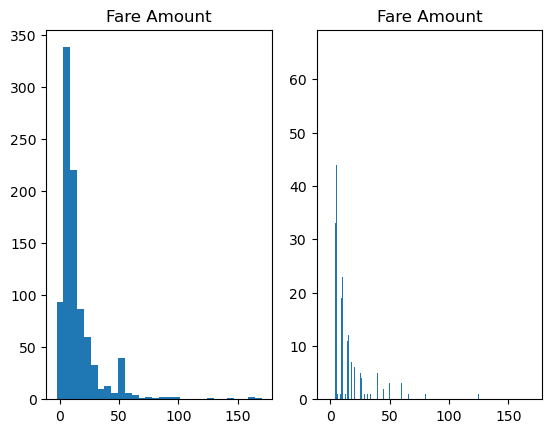

In [87]:
plt.subplot(1,2,1)
plt.hist(zero_lat_long_rows.iloc[:,[12]],bins=30)
plt.title("Fare Amount")

plt.subplot(1,2,2)
plt.hist(zero_lat_long_rows.iloc[:,[12]],bins=925)
plt.title("Fare Amount")

Text(0.5, 1.0, 'DropOff Longitude')

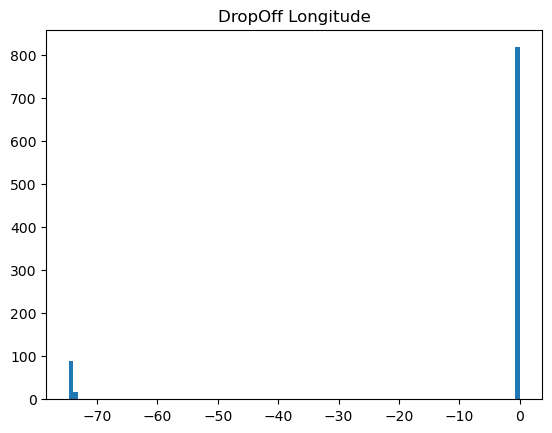

In [92]:
plt.hist(zero_lat_long_rows.iloc[:,[9]],bins=100)
plt.title("DropOff Longitude")

Text(0.5, 1.0, 'DropOff Latitude')

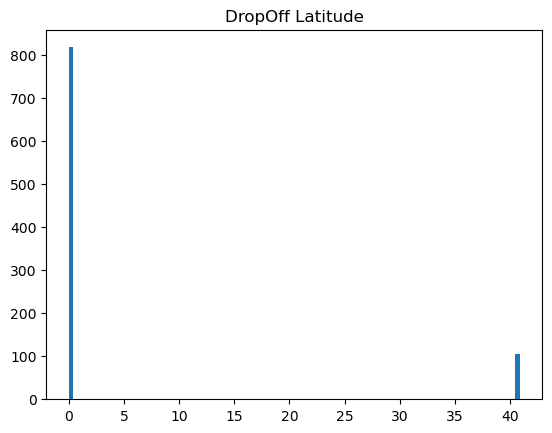

In [90]:
plt.hist(zero_lat_long_rows.iloc[:,[10]],bins=100)
plt.title("DropOff Latitude")

In [ ]:
x1 = cleaned_dropoff_data['dropoff_longitude']
y1 = cleaned_dropoff_data['dropoff_latitude']


def scatter_hist(x, y, ax, ax_histx1, ax_histy1):
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histy1.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x1, y1)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x1)), np.max(np.abs(y1)))
    lim = (int(xymax/binwidth) + 1) * binwidth

#     bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx1.hist(x1, bins=100)
    ax_histy1.hist(y1, bins=100, orientation='horizontal')

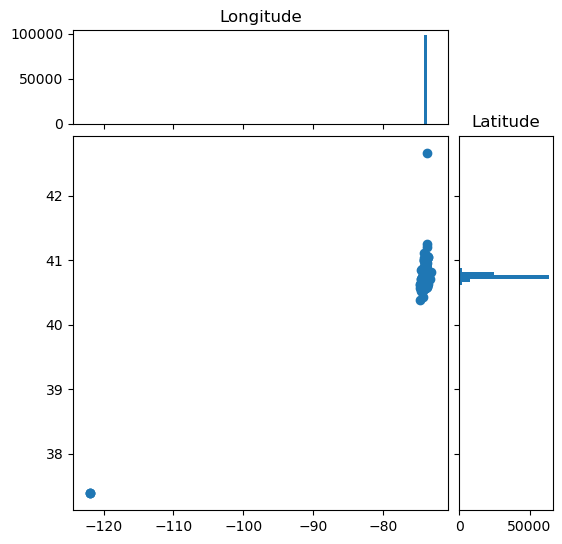

In [33]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx1 = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy1 = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx1.set_title('Longitude')  # Label for the x-axis histogram
ax_histy1.set_title('Latitude')   # Label for the y-axis histogram
# Draw the scatter plot and marginals.
scatter_hist(x1, y1, ax, ax_histx1, ax_histy1)

# Add choroplot to show the coordinates

In [ ]:
plt.hist(taxi_data["total_amount"],bins = 100000);
plt.axis([0,100, 0,500])
# plt.ylim(0,1000)
plt.show();

In [ ]:
plt.hist(taxi_data["total_amount"],bins = 100000);
plt.axis([0,78, 0,2000])
# plt.ylim(0,1000)
plt.show();

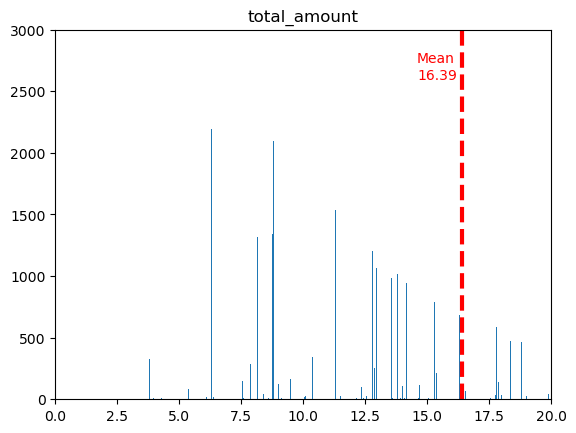

In [37]:
plt.hist(taxi_data["total_amount"], bins=100000)
plt.axvline(x=taxi_data["total_amount"].mean(), color="red", linestyle="--", linewidth=3.0)
mean_value = round(taxi_data["total_amount"].mean(), 2)
plt.text(s=f'Mean\n{mean_value}', x=0.89 * taxi_data["total_amount"].mean(), y=2600, size=10, color='red')
plt.axis([0, 20, 0, 3000])
plt.xlabel('total_amount')
plt.title("total amount")

# plt.ylim(0, 1000)
plt.show()


## Meaning of Mean:  

## Mode in python . How many max  passengers 

In [38]:
max_total_amount = taxi_data["total_amount"].max()
print(f"The maximum total amount is ${max_total_amount:.2f}")

The maximum total amount is $832.80


In [39]:
min_total_amount = taxi_data["total_amount"].min()
print(f"The minimum total amount is ${min_total_amount:.2f}")

The minimum total amount is $-47.30


In [40]:
mean_total_amount = round(taxi_data["total_amount"].mean(),2)
mean_total_amount

16.39

In [54]:
std_total_amount = round(taxi_data["total_amount"].std(),2)
std_total_amount

14.44

In [41]:
median_total_amount = statistics.median(taxi_data["total_amount"])
median_total_amount

11.8

In [52]:
Q1, Q2, Q3 = np.quantile(taxi_data["total_amount"], [.25, .5, .75] ).round(2)
W1 = (Q1 - 1.5*(Q3-Q1)).round(2)
W2 = (Q3 + 1.5*(Q3-Q1)).round(2)


AttributeError: 'float' object has no attribute 'round'

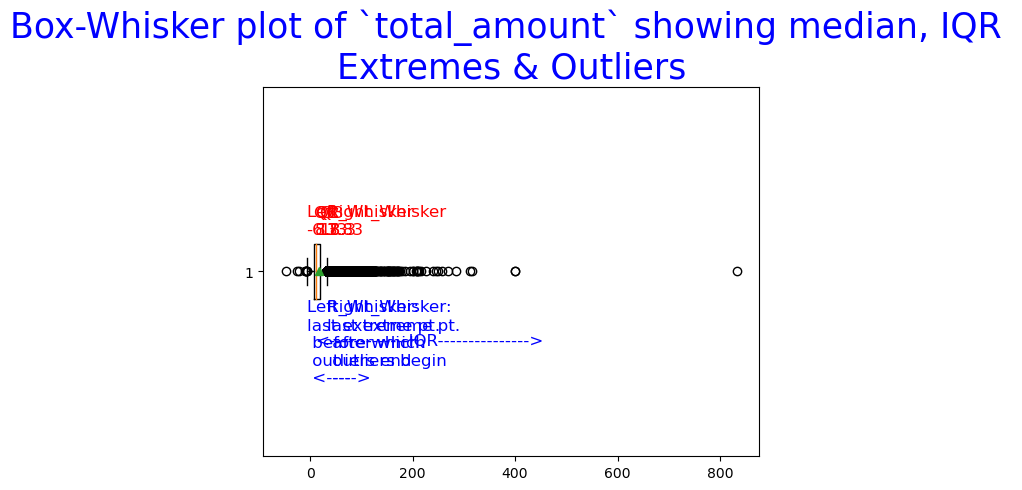

In [70]:
# print(f'Computed whiskers {(W1, W2)}')
x_adj = 0.05 # adj factor used for improving display

# my_arr[my_arr < W1]  # outliers on the lower (left) side - None
# my_arr[my_arr > W2]  # outliers on the upper (right) side - Only One 3.92

plt.boxplot(taxi_data["total_amount"], vert = False, showmeans = True)

# The lines below annotate the boxplot with Q1 Q2 Q3
plt.text(s=f'Left_Whisker \n{W1}', x= W1 - 5*x_adj, y = 1.1, color = 'red', size = 12 )
plt.text(s=f'Right_Whisker \n{W2}', x= W2 - 5*x_adj, y = 1.1, color = 'red', size = 12 )
plt.text(s=f'Q1 \n{Q1}', x= Q1 - x_adj, y = 1.1, color = 'red', size = 12  )
plt.text(s=f'Q2 \n{Q2}', x= Q2  - x_adj, y = 1.1, color = 'red', size = 12  )
plt.text(s=f'Q3 \n{Q3}', x= Q3  - x_adj, y = 1.1, color = 'red', size = 12  )


## Further annotation adjusts the x-, y-positions

plt.text(s=f'Left_Whisker: \nlast extreme pt.\n before which \n outliers end \n <----', x= W1 - 6*x_adj, y = 0.7, color = 'blue', size = 4 );
plt.text(s=f'Right_Whisker: \nlast extreme pt.\n after which \n outliers begin\n ---->', x= W2 - 6*x_adj, y = 0.7, color = 'blue', size = 4 );
plt.text(s=f'<-------------IQR--------------->', x= Q2 -1.2, y = .8, color = 'blue', size = 12 )
# plt.text(s=f'ISSUE \n : Why does right whisker \n appear at ~ 2.5\n whereas computed \n is at 3.33 ?', x= 0.5, y = .78, color = 'green', size = 12  )
plt.title('Box-Whisker plot of `total_amount` showing median, IQR \n Extremes & Outliers ', color = 'blue', size = 5  );

plt.text(s=f"total_amount : Random normal values\n mean {mean_total_amount.round(2)}, sd  {std_total_amount.round(2)} \n sample size {sample_size} ", color = 'blue', size = 10, x = Q2 - 0.75, y = 1.3  );

In [56]:
import seaborn as sns

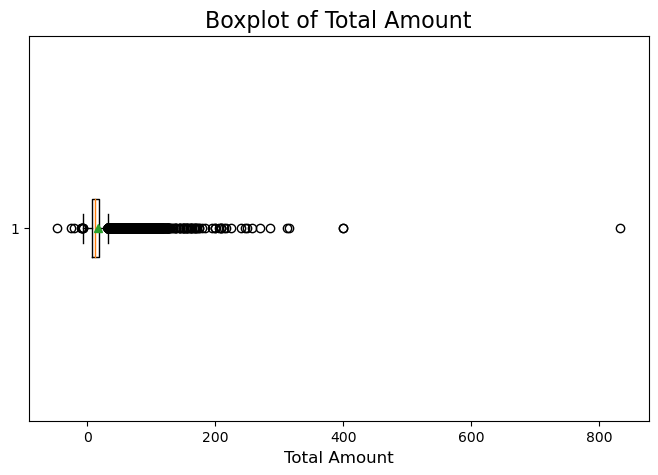

In [57]:
plt.figure(figsize=(8, 5))
plt.boxplot(taxi_data['total_amount'], vert=False, showmeans=True)

# Add title and labels
plt.title('Boxplot of Total Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=12)

# Display the plot
plt.show()

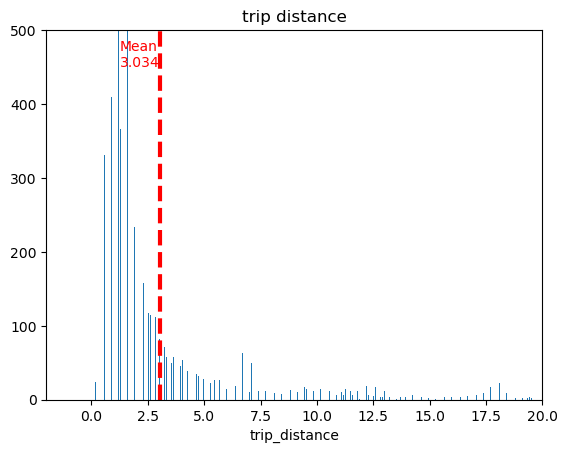

In [44]:
plt.hist(taxi_data["trip_distance"],bins = 100000);
plt.axvline(x=mean_trip_distance, color="red",linestyle="--",linewidth=3.0)
# plt.axvline(x=taxi_data["trip_distance"].median(), color="orange",linestyle="--",linewidth=3.0)
plt.text(s=f'Mean\n{mean_trip_distance}', x=0.41 * taxi_data["trip_distance"].mean(), y=450, size=10, color='red')
plt.axis([-2,20, 0,500])
# plt.ylim(0,1000)
plt.xlabel('trip_distance')
plt.title("trip distance")
plt.show();

# Scatterplot of trip_distance vs fare amount , all histogram above scatterplot

In [36]:
max_trip_distance = taxi_data["trip_distance"].max()
max_trip_distance

184.4

In [37]:
min_trip_distance = taxi_data["trip_distance"].min()
min_trip_distance

0.0

In [42]:
mean_trip_distance = round(taxi_data["trip_distance"].mean(),3)
mean_trip_distance

3.034

In [77]:
median_trip_distance = taxi_data["trip_distance"].median()
median_trip_distance

1.67

# Valid and Invalid(negative/zero) 

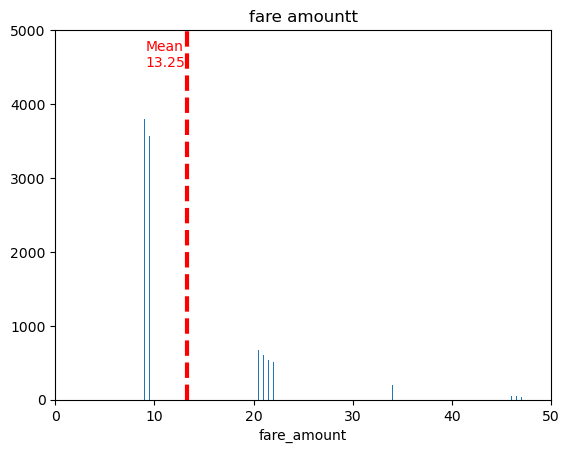

In [51]:
plt.hist(taxi_data["fare_amount"],bins = 100000);
plt.axvline(x=mean_fare_amount, color="red",linestyle="--",linewidth=3.0)
# plt.axvline(x=taxi_data["fare_amount"].median(), color="orange",linestyle="--",linewidth=3.0)
plt.text(s=f'Mean\n{mean_fare_amount}', x=0.69 * taxi_data["fare_amount"].mean(), y=4500, size=10, color='red')
# plt.axis([-50,50, 0,5000])# try this 
plt.axis([0,50, 0,5000])
plt.xlabel('fare_amount')
plt.title("fare amountt")
# plt.ylim(0,1000)
plt.show();

In [45]:
max_fare_amount = taxi_data["fare_amount"].max()
max_fare_amount

819.5

In [46]:
min_fare_amount = taxi_data["fare_amount"].min()
min_fare_amount

-47.0

In [50]:
mean_fare_amount = round(taxi_data["fare_amount"].mean(),2)
mean_fare_amount

13.25

In [ ]:
median_fare_amount = taxi_data["fare_amount"].median()
median_fare_amount

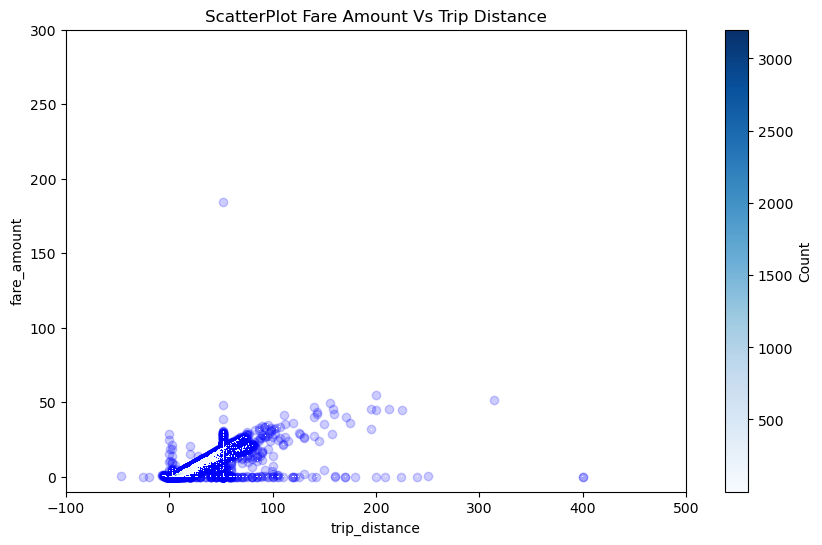

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(taxi_data['fare_amount'], taxi_data['trip_distance'], alpha=0.2,  color='b')


plt.hist2d(taxi_data['fare_amount'], taxi_data['trip_distance'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('ScatterPlot Fare Amount Vs Trip Distance')
plt.axis([-100,500,-10,300])
plt.show()

In [42]:
rmd_invalid_data = taxi_data[
    (taxi_data['trip_distance'] >= 0) & 
    (taxi_data['fare_amount'] >= 0) & 
    (taxi_data['trip_distance'] <= 400)
]

In [43]:
rmd_invalid_data.shape


(99930, 19)

In [44]:
100000-99930

70

In [30]:
# 
filter_condition = (
    (taxi_data['trip_distance'] >= 0) & (taxi_data['trip_distance'] <= 400) & 
    (taxi_data['fare_amount'] >= 0)
)




In [37]:
# filtered_fare_trip_dist = taxi_data[filter_condition]

fare_trip_rows_removed = taxi_data.shape[0] - rmd_invalid_data.shape[0]
rmd_invalid_data.reset_index(drop=True, inplace=True)

# print(f"Number of rows removed: {fare_trip_rows_removed}")
print(f"Filtered dataset shape: {filtered_fare_trip_dist.shape}")

Filtered dataset shape: (99930, 19)


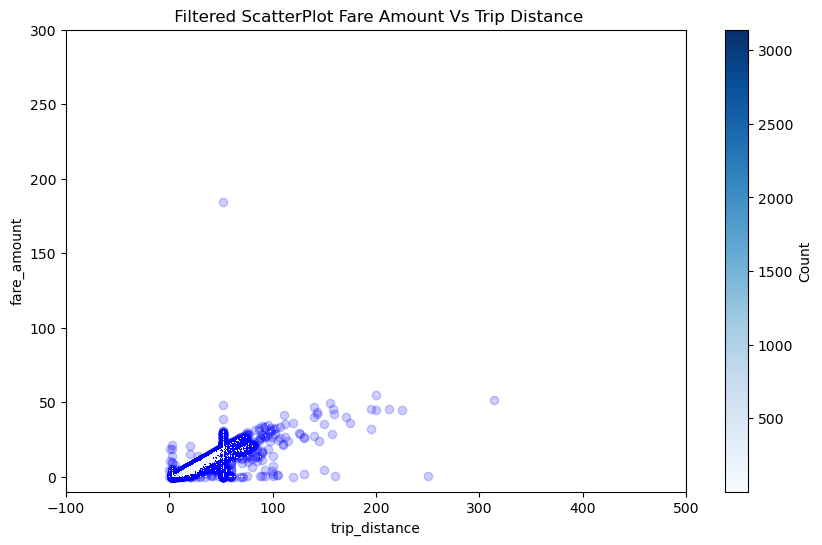

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_fare_trip_dist['fare_amount'], filtered_fare_trip_dist['trip_distance'], alpha=0.2,  color='b')


plt.hist2d(filtered_fare_trip_dist['fare_amount'], filtered_fare_trip_dist['trip_distance'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title(' Filtered ScatterPlot Fare Amount Vs Trip Distance')
plt.axis([-100,500,-10,300])
plt.show()

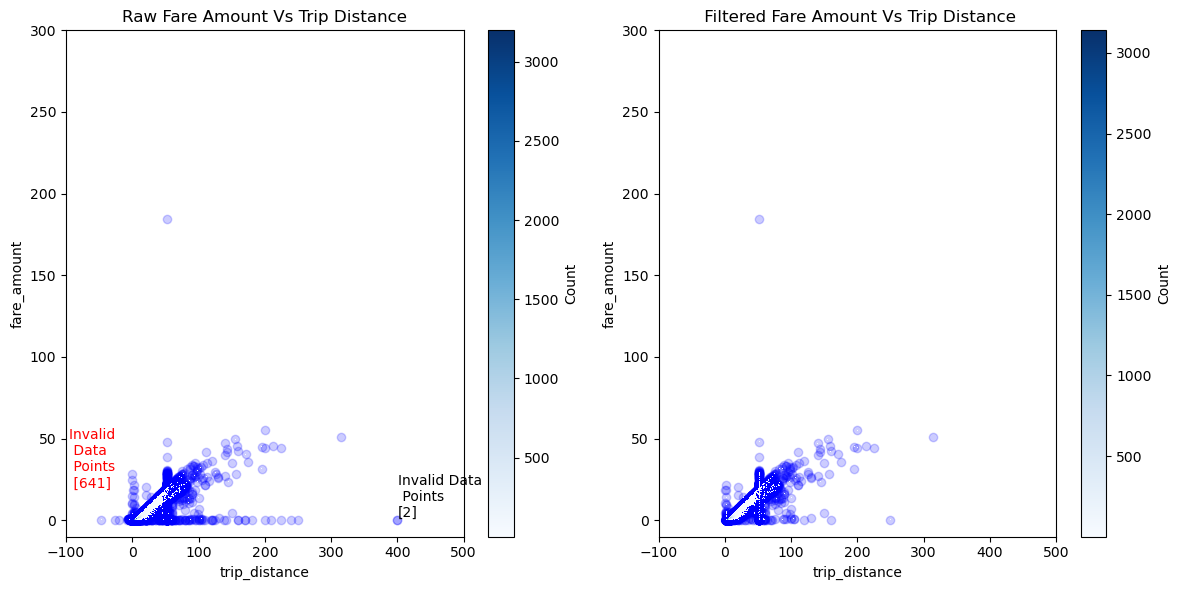

In [104]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(taxi_data['fare_amount'], taxi_data['trip_distance'], alpha=0.2,  color='b')


plt.hist2d(taxi_data['fare_amount'], taxi_data['trip_distance'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.text(s='# Invalid Data\n Points \n:2',x=401,y=2,size=10,color='black')
plt.text(s='# Invalid \n Data\n Points \n :641',x=-95,y=20,size=10,color='red')
plt.title('Raw Fare Amount Vs Trip Distance')
plt.axis([-100,500,-10,300])

plt.subplot(1,2,2)
plt.scatter(filtered_fare_trip_dist['fare_amount'], filtered_fare_trip_dist['trip_distance'], alpha=0.2,  color='b')


plt.hist2d(filtered_fare_trip_dist['fare_amount'], filtered_fare_trip_dist['trip_distance'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title(' Filtered Fare Amount Vs Trip Distance')
plt.axis([-100,500,-10,300])
plt.tight_layout() 
plt.show()

(-200.0, 500.0, -10.0, 300.0)

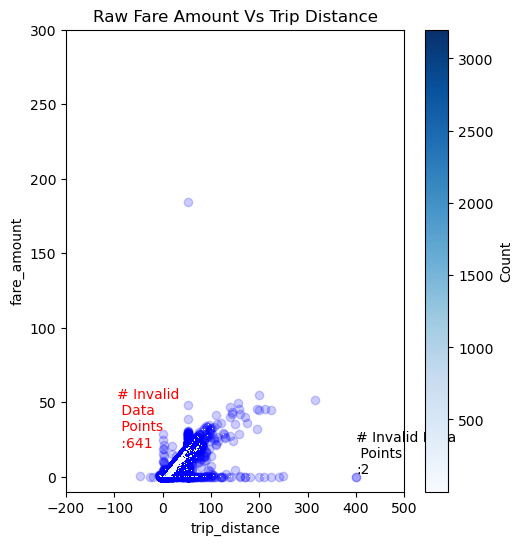

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.scatter(taxi_data['fare_amount'], taxi_data['trip_distance'], alpha=0.2,  color='b')


plt.hist2d(taxi_data['fare_amount'], taxi_data['trip_distance'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.text(s='# Invalid Data\n Points \n:2',x=401,y=2,size=10,color='black')
plt.text(s='# Invalid \n Data\n Points \n :641',x=-95,y=20,size=10,color='red')
plt.title('Raw Fare Amount Vs Trip Distance')
plt.axis([-200,500,-10,300])


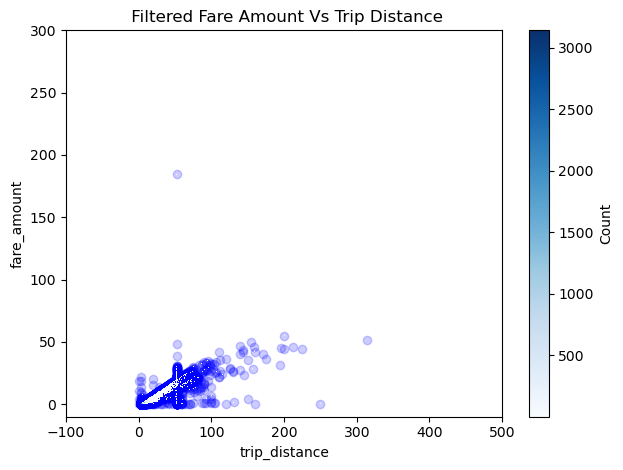

In [57]:
plt.scatter(new_taxi_data['fare_amount'], new_taxi_data['trip_distance'], alpha=0.2,  color='b')


plt.hist2d(new_taxi_data['fare_amount'], new_taxi_data['trip_distance'], bins=(1000,1000), cmap='Blues', cmin=1)
plt.colorbar(label='Count') 

plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title(' Filtered Fare Amount Vs Trip Distance')
plt.axis([-100,500,-10,300])
plt.tight_layout() 
plt.show()

In [51]:
rmd_invalid_data = taxi_data[
    (taxi_data['trip_distance'] != 0) & 
    (taxi_data['fare_amount'] !=0)]

In [52]:
rmd_invalid_data.shape

(99409, 19)

In [54]:
new_taxi_data = taxi_data[
    (taxi_data['fare_amount'] > 0) &  # Remove rows with 0 or negative fare_amount
    (taxi_data['trip_distance'] > 0) &  # Remove rows with 0 or negative trip_distance
    (taxi_data['trip_distance'] < 400)  # Remove rows with trip_distance >= 400
]

In [55]:
new_taxi_data.shape

(99359, 19)

In [56]:
100000-99359

641

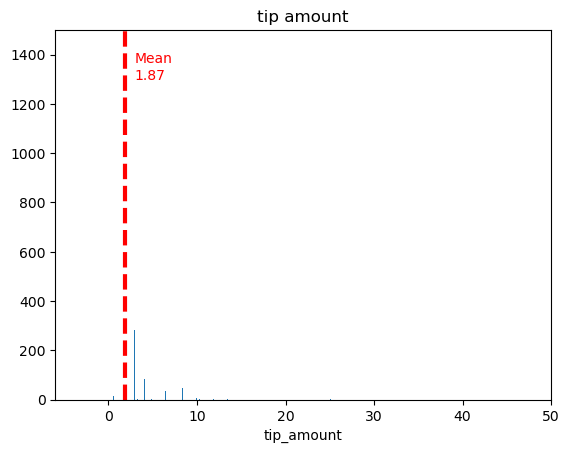

In [29]:
plt.hist(taxi_data["tip_amount"],bins = 100000);
plt.axvline(x=mean_tip_amount, color="red",linestyle="--",linewidth=3.0)
# plt.axvline(x=taxi_data["tip_amount"].median(), color="orange",linestyle="--",linewidth=3.0)
plt.text(s=f'Mean\n{mean_tip_amount}', x=3, y=1300, size=10, color='red')
plt.axis([-6,50, 0,1500])
# plt.ylim(0,1000)
plt.xlabel('tip_amount')
plt.title("tip amount")
plt.show();

In [25]:
max_tip_amount = taxi_data["tip_amount"].max()
max_tip_amount

125.88

In [26]:
min_tip_amount = taxi_data["tip_amount"].min()
min_tip_amount

-2.7

In [27]:
mean_tip_amount = round(taxi_data["tip_amount"].mean(),2)
mean_tip_amount

1.87

In [28]:
median_tip_amount = taxi_data["tip_amount"].median()
median_tip_amount

1.36

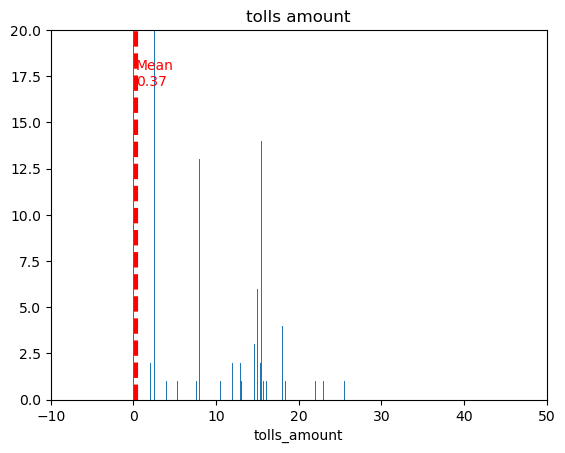

In [73]:
plt.hist(taxi_data["tolls_amount"],bins = 1000);
plt.axvline(x=taxi_data["tolls_amount"].mean(), color="red",linestyle="--",linewidth=3.0)
# plt.axvline(x=taxi_data["tolls_amount"].median(), color="orange",linestyle="--",linewidth=3.0)
plt.text(s=f'Mean\n{mean_tolls_amount}', x=0.89 * mean_tolls_amount, y=17, size=10, color='red')
plt.axis([-10,50, 0,20])
# plt.ylim(0,1000)
plt.xlabel('tolls_amount')
plt.title("tolls amount")
plt.show();

In [66]:
max_tolls_amount = taxi_data["tolls_amount"].max()
max_tolls_amount

25.54

In [67]:
min_tolls_amount = taxi_data["tolls_amount"].min()
min_tolls_amount

0.0

In [72]:
mean_tolls_amount = round(taxi_data["tolls_amount"].mean(),2)
mean_tolls_amount

0.37

In [69]:
median_tolls_amount = taxi_data["tolls_amount"].median()
median_tolls_amount

0.0

In [75]:
zero_toll_data = taxi_data[taxi_data['tolls_amount'] == 0]
non_zero_toll_data = taxi_data[taxi_data['tolls_amount'] != 0]

In [78]:
zero_toll_data.shape

(93880, 19)

In [77]:
non_zero_toll_data.shape

(6120, 19)

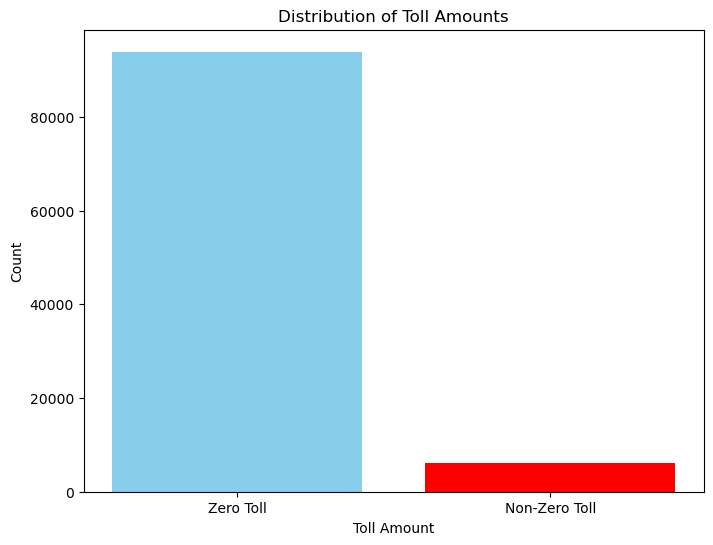

In [76]:
plt.figure(figsize=(8, 6))# reduce width of bar 
plt.bar(['Zero Toll', 'Non-Zero Toll'], [len(zero_toll_data), len(non_zero_toll_data)], color=['skyblue', 'red'])
plt.xlabel('Toll Amount')
plt.ylabel('Count')
plt.title('Distribution of Toll Amounts')
plt.show()

# Study New York Geography which are the toll highways??
# Create a subset of all non-zero toll trips.
# Regression in fare_amount = trip_distance, tolls, all others variables)

# separate data and time 

In [10]:
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%m-%d-%Y %H:%M')

taxi_data['date'] = taxi_data['tpep_dropoff_datetime'].dt.date
taxi_data['time'] = taxi_data['tpep_dropoff_datetime'].dt.time

# dates_table = taxi_data[['date']].drop_duplicates().reset_index(drop=True)
# times_table = taxi_data[['time']].drop_duplicates().reset_index(drop=True)

# dates_table.to_csv("dates_table.csv", index=False)
# times_table.to_csv("times_table.csv", index=False)

# print("Dates Table:")
# print(dates_table)

# print("\nTimes Table:")
# print(times_table)

In [5]:
taxi_data['time']

0        00:07:00
1        00:11:00
2        00:31:00
3        00:00:00
4        00:00:00
           ...   
99995    06:22:00
99996    06:32:00
99997    06:37:00
99998    06:22:00
99999    06:22:00
Name: time, Length: 100000, dtype: object

In [83]:
taxi_data['date']

0        2016-01-03
1        2016-01-03
2        2016-01-03
3        2016-01-03
4        2016-01-03
            ...    
99995    2016-01-03
99996    2016-01-03
99997    2016-01-03
99998    2016-01-03
99999    2016-01-03
Name: date, Length: 100000, dtype: object

In [84]:
unique_dates = taxi_data['date'].unique()

print(unique_dates)

[datetime.date(2016, 1, 3) datetime.date(2016, 10, 3)
 datetime.date(2016, 11, 3) datetime.date(2016, 2, 3)]


In [9]:
dates_table = taxi_data[['date']].drop_duplicates().reset_index(drop=True)
dates_table

,date
0,2016-01-03
1,2016-10-03
2,2016-11-03
3,2016-02-03


In [85]:
times_table = taxi_data[['time']].drop_duplicates().reset_index(drop=True)

In [16]:
dates_table

,date
0,2016-01-03
1,2016-10-03
2,2016-11-03
3,2016-02-03


In [17]:
times_table

,time
0,00:07:00
1,00:11:00
2,00:31:00
3,00:00:00
4,00:16:00
...,...
942,15:57:00
943,15:42:00
944,16:09:00
945,07:07:00


In [11]:
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%m-%d-%Y %H:%M')

taxi_data['date'] = taxi_data['tpep_dropoff_datetime'].dt.date
taxi_data['time'] = taxi_data['tpep_dropoff_datetime'].dt.time

separate_time_date = taxi_data.copy()
separate_time_date

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
0,1,01-03-2016 00:00,2016-01-03 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,2016-01-03,00:07:00
1,1,01-03-2016 00:00,2016-01-03 00:11:00,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-03,00:11:00
2,2,01-03-2016 00:00,2016-01-03 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2016-01-03,00:31:00
3,2,01-03-2016 00:00,2016-01-03 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,2016-01-03,00:00:00
4,2,01-03-2016 00:00,2016-01-03 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,2016-01-03,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,01-03-2016 06:17,2016-01-03 06:22:00,1,0.50,-73.990898,40.750519,1,N,-73.998245,...,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,2016-01-03,06:22:00
99996,1,01-03-2016 06:17,2016-01-03 06:32:00,1,3.40,-74.014488,40.718296,1,N,-73.982361,...,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,2016-01-03,06:32:00
99997,1,01-03-2016 06:17,2016-01-03 06:37:00,1,9.70,-73.963379,40.774097,1,N,-73.865028,...,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,2016-01-03,06:37:00
99998,2,01-03-2016 06:17,2016-01-03 06:22:00,1,0.92,-73.984901,40.763111,1,N,-73.970696,...,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,2016-01-03,06:22:00


In [34]:
taxi_data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
0,1,01-03-2016 00:00,2016-01-03 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,2016-01-03,00:07:00
1,1,01-03-2016 00:00,2016-01-03 00:11:00,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-03,00:11:00
2,2,01-03-2016 00:00,2016-01-03 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2016-01-03,00:31:00
3,2,01-03-2016 00:00,2016-01-03 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,2016-01-03,00:00:00
4,2,01-03-2016 00:00,2016-01-03 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,2016-01-03,00:00:00
5,2,01-03-2016 00:00,2016-01-03 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,...,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36,2016-01-03,00:00:00
6,2,01-03-2016 00:00,2016-01-03 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,...,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30,2016-01-03,00:00:00
7,1,01-03-2016 00:00,2016-01-03 00:16:00,1,6.20,-73.788773,40.647758,1,N,-73.829208,...,3,20.5,0.5,0.5,0.00,0.00,0.3,21.80,2016-01-03,00:16:00
8,1,01-03-2016 00:00,2016-01-03 00:05:00,1,0.70,-73.958221,40.764641,1,N,-73.967896,...,1,5.5,0.5,0.5,2.00,0.00,0.3,8.80,2016-01-03,00:05:00
9,2,01-03-2016 00:00,2016-01-03 00:24:00,3,7.18,-73.985779,40.741192,1,N,-73.946350,...,1,23.5,0.5,0.5,3.20,0.00,0.3,28.00,2016-01-03,00:24:00


In [12]:
taxi_data = taxi_data.sort_values(by=['date', 'time'], ascending=True).reset_index(drop=True)

In [21]:
taxi_data.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
0,2,2016-01-03 00:00:00,2016-01-03 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,2016-01-03,00:00:00
1,2,2016-01-03 00:00:00,2016-01-03 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,2016-01-03,00:00:00
2,2,2016-01-03 00:00:00,2016-01-03 00:00:00,5,5.92,-74.017197,40.705383,1,N,-73.978073,...,1,23.5,1.0,0.5,5.06,0.00,0.3,30.36,2016-01-03,00:00:00
3,2,2016-01-03 00:00:00,2016-01-03 00:00:00,6,5.72,-73.994583,40.727848,1,N,0.000000,...,2,23.0,0.5,0.5,0.00,0.00,0.3,24.30,2016-01-03,00:00:00
4,1,2016-01-03 00:00:00,2016-01-03 00:01:00,2,0.20,-73.988564,40.749241,1,N,-73.985275,...,2,3.0,0.5,0.5,0.00,0.00,0.3,4.30,2016-01-03,00:01:00
5,2,2016-01-03 00:01:00,2016-01-03 00:01:00,1,0.03,-73.984138,40.759262,1,N,-73.984520,...,2,2.5,0.5,0.5,0.00,0.00,0.3,3.80,2016-01-03,00:01:00
6,2,2016-01-03 00:00:00,2016-01-03 00:02:00,2,0.54,-73.988426,40.764160,1,N,-73.992393,...,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30,2016-01-03,00:02:00
7,2,2016-01-03 00:00:00,2016-01-03 00:02:00,2,0.80,-73.966423,40.761650,1,N,-73.959023,...,1,4.5,0.5,0.5,1.16,0.00,0.3,6.96,2016-01-03,00:02:00
8,2,2016-01-03 00:00:00,2016-01-03 00:02:00,2,0.49,-73.989868,40.757118,1,N,-73.985390,...,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30,2016-01-03,00:02:00
9,2,2016-01-03 00:00:00,2016-01-03 00:02:00,1,0.95,-73.995918,40.738670,1,N,-73.992035,...,2,4.5,0.5,0.5,0.00,0.00,0.3,5.80,2016-01-03,00:02:00


In [22]:
taxi_data.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
99990,2,2016-10-03 14:06:00,2016-11-03 13:46:00,1,13.19,-74.013130,40.705563,1,N,-73.871078,...,1,42.5,0.0,0.5,7.33,5.54,0.3,56.17,2016-11-03,13:46:00
99991,2,2016-10-03 13:54:00,2016-11-03 13:51:00,6,0.91,-73.982773,40.748367,1,N,-73.973305,...,2,6.0,0.0,0.5,0.00,0.00,0.3,6.80,2016-11-03,13:51:00
99992,2,2016-10-03 14:13:00,2016-11-03 13:51:00,5,1.03,-73.970261,40.768215,1,N,-73.979210,...,1,8.0,0.0,0.5,1.76,0.00,0.3,10.56,2016-11-03,13:51:00
99993,2,2016-10-03 14:12:00,2016-11-03 13:53:00,1,4.75,-74.011162,40.703548,1,N,-73.977943,...,1,16.5,0.0,0.5,1.73,0.00,0.3,19.03,2016-11-03,13:53:00
99994,2,2016-10-03 14:03:00,2016-11-03 13:57:00,1,1.11,-74.007271,40.716019,1,N,-74.014481,...,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80,2016-11-03,13:57:00
99995,2,2016-10-03 14:08:00,2016-11-03 14:00:00,2,0.78,-73.983261,40.762783,1,N,-73.979790,...,2,13.0,0.0,0.5,0.00,0.00,0.3,13.80,2016-11-03,14:00:00
99996,2,2016-10-03 14:09:00,2016-11-03 14:00:00,1,0.05,-73.977570,40.763699,1,N,-73.977318,...,2,2.5,0.0,0.5,0.00,0.00,0.3,3.30,2016-11-03,14:00:00
99997,2,2016-10-03 14:11:00,2016-11-03 14:03:00,1,0.35,-73.993813,40.751621,1,N,-73.990082,...,2,7.5,0.0,0.5,0.00,0.00,0.3,8.30,2016-11-03,14:03:00
99998,2,2016-10-03 14:15:00,2016-11-03 14:10:00,1,20.90,-73.980431,40.780224,2,N,-73.781876,...,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,2016-11-03,14:10:00
99999,2,2016-10-03 14:22:00,2016-11-03 14:19:00,1,0.87,-73.954041,40.770580,1,N,-73.945290,...,2,6.0,0.0,0.5,0.00,0.00,0.3,6.80,2016-11-03,14:19:00


In [13]:
date_time_mapping = taxi_data.groupby('date')['time'].apply(list)

In [37]:
date_time_mapping.head

<bound method NDFrame.head of date
2016-01-03    [00:00:00, 00:00:00, 00:00:00, 00:00:00, 00:01...
2016-02-03    [00:00:00, 00:00:00, 00:00:00, 00:00:00, 00:00...
2016-10-03    [07:08:00, 07:09:00, 07:09:00, 07:09:00, 07:09...
2016-11-03    [00:00:00, 00:00:00, 00:00:00, 00:00:00, 00:00...
Name: time, dtype: object>

In [14]:
date_time_range = (
    taxi_data.groupby('date')['time']
    .apply(lambda times: f"[{min(times)} - {max(times)}]")  
    .sort_index()  
)

In [9]:
date_time_range

date
2016-01-03    [00:00:00 - 23:59:00]
2016-02-03    [00:00:00 - 06:14:00]
2016-10-03    [07:08:00 - 18:32:00]
2016-11-03    [00:00:00 - 14:19:00]
Name: time, dtype: object

datetime.date(2016, 1, 3) datetime.date(2016, 10, 3)
 datetime.date(2016, 11, 3) datetime.date(2016, 2, 3)]

In [91]:
dates_table = pd.DataFrame({"date": ["2016-01-03", "2016-02-03  ", "2016-10-03 ", "2016-11-03"]})
dates_table['date'] = pd.to_datetime(dates_table['date'].str.strip()).dt.tz_localize('UTC').dt.tz_convert('America/New_York')
dates_table['day_name'] = dates_table['date'].dt.day_name()

In [92]:
dates_table

,date,day_name
0,2016-01-02 19:00:00-05:00,Saturday
1,2016-02-02 19:00:00-05:00,Tuesday
2,2016-10-02 20:00:00-04:00,Sunday
3,2016-11-02 20:00:00-04:00,Wednesday


In [83]:
type(taxi_data['tpep_dropoff_datetime'])
np.hstack(dir(taxi_data['tpep_dropoff_datetime']))

array(['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER',
       '_HANDLED_TYPES', '__abs__', '__add__', '__and__',
       '__annotations__', '__array__', '__array_priority__',
       '__array_ufunc__', '__array_wrap__', '__bool__', '__class__',
       '__contains__', '__copy__', '__deepcopy__', '__delattr__',
       '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__',
       '__eq__', '__finalize__', '__float__', '__floordiv__',
       '__format__', '__ge__', '__getattr__', '__getattribute__',
       '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__',
       '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__',
       '__init_subclass__', '__int__', '__invert__', '__ior__',
       '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__',
       '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__',
       '__module__', '__mul__', '__ne__', '__neg__', '__new__',
       '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__',

In [93]:
new_order_dataset= [1,19,20,2]  
new_order_dataset = taxi_data.iloc[:, new_order_dataset]

In [94]:
new_order_dataset.head(10)

,tpep_pickup_datetime,time_frame,date,tpep_dropoff_datetime
0,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:07:00
1,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:11:00
2,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:31:00
3,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:00:00
4,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:00:00
5,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:00:00
6,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:00:00
7,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:16:00
8,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:05:00
9,2016-01-03,2016-01-03,2016-01-03,2016-01-03 00:24:00


 Note: Extracted date format is yyyy-mm-dd

In [95]:
# Convert 'tpep_pickup_datetime' to datetime if not already
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

# Create 15-minute time frames
taxi_data['time_frame'] = taxi_data['tpep_pickup_datetime'].dt.floor('15T')

# Extract the date for grouping and sorting
taxi_data['date'] = taxi_data['time_frame'].dt.date

# Group by date and time_frame, then count pickups
pickup_counts = (
    taxi_data.groupby(['date', 'time_frame'])
    .size()
    .reset_index(name='pickup_count')
)

print(pickup_counts)


          date          time_frame  pickup_count
0   2016-01-03 2016-01-03 00:00:00          2189
1   2016-01-03 2016-01-03 00:15:00          1802
2   2016-01-03 2016-01-03 00:30:00          1636
3   2016-01-03 2016-01-03 00:45:00          1452
4   2016-01-03 2016-01-03 01:00:00          1262
5   2016-01-03 2016-01-03 01:15:00          1103
6   2016-01-03 2016-01-03 01:30:00           943
7   2016-01-03 2016-01-03 01:45:00           840
8   2016-01-03 2016-01-03 02:00:00           760
9   2016-01-03 2016-01-03 02:15:00           697
10  2016-01-03 2016-01-03 02:30:00           585
11  2016-01-03 2016-01-03 02:45:00           560
12  2016-01-03 2016-01-03 03:00:00           518
13  2016-01-03 2016-01-03 03:15:00           489
14  2016-01-03 2016-01-03 03:30:00           447
15  2016-01-03 2016-01-03 03:45:00           406
16  2016-01-03 2016-01-03 04:00:00           501
17  2016-01-03 2016-01-03 04:15:00           462
18  2016-01-03 2016-01-03 04:30:00           475
19  2016-01-03 2016-

In [15]:
# Convert 'tpep_pickup_datetime' to datetime if not already
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime'])

# Create 15-minute time frames
taxi_data['time_frame'] = taxi_data['tpep_pickup_datetime'].dt.floor('15T')

# Extract the date for grouping
taxi_data['date'] = taxi_data['time_frame'].dt.date

# Group by date and time_frame, count pickups, and sum passenger_count
pickup_summary = (
    taxi_data.groupby(['date', 'time_frame'])
    .agg(
        pickup_count=('time_frame', 'size'),
        total_passenger_count=('passenger_count', 'sum')
    )
    .reset_index()
)

print(pickup_summary)


          date          time_frame  pickup_count  total_passenger_count
0   2016-01-03 2016-01-03 00:00:00          2189                   3577
1   2016-01-03 2016-01-03 00:15:00          1802                   2908
2   2016-01-03 2016-01-03 00:30:00          1636                   2593
3   2016-01-03 2016-01-03 00:45:00          1452                   2397
4   2016-01-03 2016-01-03 01:00:00          1262                   2030
5   2016-01-03 2016-01-03 01:15:00          1103                   1816
6   2016-01-03 2016-01-03 01:30:00           943                   1566
7   2016-01-03 2016-01-03 01:45:00           840                   1320
8   2016-01-03 2016-01-03 02:00:00           760                   1263
9   2016-01-03 2016-01-03 02:15:00           697                   1098
10  2016-01-03 2016-01-03 02:30:00           585                    896
11  2016-01-03 2016-01-03 02:45:00           560                    872
12  2016-01-03 2016-01-03 03:00:00           518                

In [11]:
unique_dates = separate_time_date['date'].unique()

print(unique_dates)

[datetime.date(2016, 1, 3) datetime.date(2016, 10, 3)
 datetime.date(2016, 11, 3) datetime.date(2016, 2, 3)]


In [10]:
separate_time_date.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
0,1,01-03-2016 00:00,2016-01-03 00:07:00,1,2.5,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,2016-01-03,00:07:00
1,1,01-03-2016 00:00,2016-01-03 00:11:00,1,2.9,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.0,0.3,15.35,2016-01-03,00:11:00


In [16]:
# Convert 'tpep_pickup_datetime' to datetime if not already
separate_time_date['date'] = pd.to_datetime(separate_time_date['date'])

# Filter rows for the specific date and time range
data_2016_01_03 = separate_time_date[
    (separate_time_date['date'].dt.date == pd.Timestamp('2016-01-03').date())
]

data_2016_01_03


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
0,1,01-03-2016 00:00,2016-01-03 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,2016-01-03,00:07:00
1,1,01-03-2016 00:00,2016-01-03 00:11:00,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-03,00:11:00
2,2,01-03-2016 00:00,2016-01-03 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2016-01-03,00:31:00
3,2,01-03-2016 00:00,2016-01-03 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,2016-01-03,00:00:00
4,2,01-03-2016 00:00,2016-01-03 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,2016-01-03,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,01-03-2016 06:17,2016-01-03 06:22:00,1,0.50,-73.990898,40.750519,1,N,-73.998245,...,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,2016-01-03,06:22:00
99996,1,01-03-2016 06:17,2016-01-03 06:32:00,1,3.40,-74.014488,40.718296,1,N,-73.982361,...,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,2016-01-03,06:32:00
99997,1,01-03-2016 06:17,2016-01-03 06:37:00,1,9.70,-73.963379,40.774097,1,N,-73.865028,...,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,2016-01-03,06:37:00
99998,2,01-03-2016 06:17,2016-01-03 06:22:00,1,0.92,-73.984901,40.763111,1,N,-73.970696,...,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,2016-01-03,06:22:00


In [8]:
data_2016_01_03.shape

(23192, 21)

In [17]:
# Convert 'tpep_pickup_datetime' to datetime if not already
taxi_data['date'] = pd.to_datetime(taxi_data['date'])

# Filter rows for the specific date '2016-10-03'
data_2016_10_03 = taxi_data[
    taxi_data['date'].dt.date == pd.Timestamp('2016-10-03 ').date()
]

data_2016_10_03


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time,time_frame
23220,2,2016-10-03 07:08:00,2016-10-03 07:08:00,5,0.00,-73.902107,40.764065,1,N,-73.902092,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,2016-10-03,07:08:00,2016-10-03 07:00:00
23221,2,2016-10-03 07:07:00,2016-10-03 07:09:00,1,0.49,-73.944763,40.780312,1,N,-73.948959,...,3.5,0.0,0.5,0.00,0.00,0.3,4.30,2016-10-03,07:09:00,2016-10-03 07:00:00
23222,2,2016-10-03 07:07:00,2016-10-03 07:09:00,1,0.41,-73.957596,40.774052,1,N,-73.953911,...,3.5,0.0,0.5,0.00,0.00,0.3,4.30,2016-10-03,07:09:00,2016-10-03 07:00:00
23223,2,2016-10-03 07:07:00,2016-10-03 07:09:00,5,0.49,-73.963043,40.756977,1,N,-73.970390,...,3.5,0.0,0.5,0.86,0.00,0.3,5.16,2016-10-03,07:09:00,2016-10-03 07:00:00
23224,2,2016-10-03 07:07:00,2016-10-03 07:09:00,1,0.30,-74.006378,40.705830,1,N,-74.011208,...,3.5,0.0,0.5,0.86,0.00,0.3,5.16,2016-10-03,07:09:00,2016-10-03 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2016-10-03 14:08:00,2016-11-03 14:00:00,2,0.78,-73.983261,40.762783,1,N,-73.979790,...,13.0,0.0,0.5,0.00,0.00,0.3,13.80,2016-10-03,14:00:00,2016-10-03 14:00:00
99996,2,2016-10-03 14:09:00,2016-11-03 14:00:00,1,0.05,-73.977570,40.763699,1,N,-73.977318,...,2.5,0.0,0.5,0.00,0.00,0.3,3.30,2016-10-03,14:00:00,2016-10-03 14:00:00
99997,2,2016-10-03 14:11:00,2016-11-03 14:03:00,1,0.35,-73.993813,40.751621,1,N,-73.990082,...,7.5,0.0,0.5,0.00,0.00,0.3,8.30,2016-10-03,14:03:00,2016-10-03 14:00:00
99998,2,2016-10-03 14:15:00,2016-11-03 14:10:00,1,20.90,-73.980431,40.780224,2,N,-73.781876,...,52.0,0.0,0.5,0.00,5.54,0.3,58.34,2016-10-03,14:10:00,2016-10-03 14:15:00


In [10]:
data_2016_10_03.shape

(76780, 22)

In [18]:
# Convert 'tpep_pickup_datetime' to datetime if not already
separate_time_date['date'] = pd.to_datetime(separate_time_date['date'])

# Filter rows for the specific date '2016-11-03'
data_2016_11_03 = taxi_data[
    separate_time_date['date'].dt.date == pd.Timestamp('2016-11-03 ').date()
]

data_2016_11_03

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time,time_frame
927,1,2016-01-03 00:02:00,2016-01-03 00:16:00,1,9.20,-73.870789,40.773788,1,N,-73.952881,...,25.5,0.5,0.5,2.00,5.54,0.3,34.34,2016-01-03,00:16:00,2016-01-03 00:00:00
2135,1,2016-01-03 00:11:00,2016-01-03 00:26:00,1,5.20,-73.985565,40.727383,1,N,-73.945641,...,16.0,0.5,0.5,4.30,0.00,0.3,21.60,2016-01-03,00:26:00,2016-01-03 00:00:00
2273,1,2016-01-03 00:17:00,2016-01-03 00:27:00,1,4.20,-73.992165,40.721573,1,N,-73.953087,...,14.0,0.5,0.5,3.05,0.00,0.3,18.35,2016-01-03,00:27:00,2016-01-03 00:15:00
2705,1,2016-01-03 00:27:00,2016-01-03 00:30:00,1,0.40,-73.942139,40.754311,1,N,-73.936584,...,4.5,0.5,0.5,0.00,0.00,0.3,5.80,2016-01-03,00:30:00,2016-01-03 00:15:00
3132,1,2016-01-03 00:18:00,2016-01-03 00:34:00,1,3.70,-73.955696,40.779705,1,N,-73.986458,...,15.0,0.5,0.5,4.07,0.00,0.3,20.37,2016-01-03,00:34:00,2016-01-03 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97127,2,2016-10-03 14:23:00,2016-10-03 14:28:00,2,0.85,-74.105141,40.681492,1,N,-74.105141,...,5.0,0.0,0.5,1.00,0.00,0.3,6.80,2016-10-03,14:28:00,2016-10-03 14:15:00
97487,2,2016-10-03 14:02:00,2016-10-03 14:31:00,1,4.85,-74.013863,40.709518,1,N,-73.943611,...,21.5,0.0,0.5,5.58,0.00,0.3,27.88,2016-10-03,14:31:00,2016-10-03 14:00:00
98716,2,2016-10-03 14:06:00,2016-10-03 14:42:00,1,15.13,-73.973511,40.743450,2,N,-73.783501,...,52.0,0.0,0.5,14.58,5.54,0.3,72.92,2016-10-03,14:42:00,2016-10-03 14:00:00
98741,2,2016-10-03 14:20:00,2016-10-03 14:42:00,4,2.16,-73.973236,40.763618,1,N,-73.949608,...,14.5,0.0,0.5,3.82,0.00,0.3,19.12,2016-10-03,14:42:00,2016-10-03 14:15:00


In [12]:
data_2016_11_03.shape

(164, 22)

In [19]:
taxi_data=pd.read_csv(r"C:\Users\Sanjoy\Desktop\Bittu's File\SEM V\AI\uber_data.csv")

In [20]:
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%m-%d-%Y %H:%M')

taxi_data['date'] = taxi_data['tpep_dropoff_datetime'].dt.date
taxi_data['time'] = taxi_data['tpep_dropoff_datetime'].dt.time

separate_time_date = taxi_data.copy()
separate_time_date

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
0,1,01-03-2016 00:00,2016-01-03 00:07:00,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,2016-01-03,00:07:00
1,1,01-03-2016 00:00,2016-01-03 00:11:00,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-03,00:11:00
2,2,01-03-2016 00:00,2016-01-03 00:31:00,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2016-01-03,00:31:00
3,2,01-03-2016 00:00,2016-01-03 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,2016-01-03,00:00:00
4,2,01-03-2016 00:00,2016-01-03 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,2016-01-03,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,01-03-2016 06:17,2016-01-03 06:22:00,1,0.50,-73.990898,40.750519,1,N,-73.998245,...,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,2016-01-03,06:22:00
99996,1,01-03-2016 06:17,2016-01-03 06:32:00,1,3.40,-74.014488,40.718296,1,N,-73.982361,...,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,2016-01-03,06:32:00
99997,1,01-03-2016 06:17,2016-01-03 06:37:00,1,9.70,-73.963379,40.774097,1,N,-73.865028,...,1,29.0,0.0,0.5,8.80,5.54,0.3,44.14,2016-01-03,06:37:00
99998,2,01-03-2016 06:17,2016-01-03 06:22:00,1,0.92,-73.984901,40.763111,1,N,-73.970696,...,1,5.5,0.5,0.5,1.36,0.00,0.3,8.16,2016-01-03,06:22:00


In [21]:
# Convert 'tpep_pickup_datetime' to datetime if not already
taxi_data['date'] = pd.to_datetime(taxi_data['date'])

# Filter rows for the specific date '2016-02-03'
data_2016_02_03 = taxi_data[
    taxi_data['date'].dt.date == pd.Timestamp('2016-02-03 ').date()
]

data_2016_02_03

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
65630,2,01-03-2016 00:07,2016-02-03 00:04:00,3,2.29,-73.973862,40.764160,1,N,-73.986710,...,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,2016-02-03,00:04:00
70985,2,01-03-2016 00:18,2016-02-03 00:05:00,6,0.79,-74.003883,40.748207,1,N,-73.994476,...,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,2016-02-03,00:05:00
71992,2,01-03-2016 00:27,2016-02-03 00:02:00,2,6.82,-73.976143,40.764149,1,N,-73.879669,...,1,23.5,0.5,0.5,4.96,0.00,0.3,29.76,2016-02-03,00:02:00
73078,2,01-03-2016 00:36,2016-02-03 00:23:00,1,2.30,-73.994186,40.738789,1,N,-73.992851,...,2,9.5,0.5,0.5,0.00,0.00,0.3,10.80,2016-02-03,00:23:00
73540,2,01-03-2016 00:40,2016-02-03 00:37:00,1,0.65,-74.008232,40.741253,1,N,-74.006523,...,2,4.0,0.5,0.5,0.00,0.00,0.3,5.30,2016-02-03,00:37:00
73677,2,01-03-2016 00:42,2016-02-03 00:00:00,1,17.47,-73.781830,40.644661,2,N,-73.985840,...,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,2016-02-03,00:00:00
76283,2,01-03-2016 01:10,2016-02-03 00:54:00,1,1.33,-73.983238,40.744530,1,N,-73.981613,...,1,6.0,0.5,0.5,1.46,0.00,0.3,8.76,2016-02-03,00:54:00
79440,2,01-03-2016 01:15,2016-02-03 01:03:00,1,2.14,-73.962166,40.760437,1,N,-73.985031,...,1,9.5,0.5,0.5,1.08,0.00,0.3,11.88,2016-02-03,01:03:00
79849,2,01-03-2016 01:20,2016-02-03 00:00:00,1,1.51,-73.963676,40.710796,1,N,-73.951332,...,1,7.0,0.5,0.5,2.08,0.00,0.3,10.38,2016-02-03,00:00:00
80908,2,01-03-2016 01:35,2016-02-03 00:47:00,1,1.01,-74.003159,40.732857,1,N,-73.993134,...,1,6.5,0.5,0.5,0.00,0.00,0.3,7.80,2016-02-03,00:47:00


In [11]:
data_2016_02_03.shape

(28, 21)

In [22]:
23192+76616+164+28

100000

In [16]:
data_2016_02_03.sort_values(by='time')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date,time
79849,2,01-03-2016 01:20,2016-02-03 00:00:00,1,1.51,-73.963676,40.710796,1,N,-73.951332,...,1,7.0,0.5,0.5,2.08,0.00,0.3,10.38,2016-02-03,00:00:00
84947,2,01-03-2016 03:01,2016-02-03 00:00:00,1,1.26,-74.002602,40.733665,1,N,-73.983727,...,2,7.5,0.5,0.5,0.00,0.00,0.3,8.80,2016-02-03,00:00:00
91238,2,01-03-2016 05:47,2016-02-03 00:00:00,1,3.42,-73.916946,40.743198,1,N,-73.970200,...,2,12.5,0.5,0.5,0.00,0.00,0.3,13.80,2016-02-03,00:00:00
92432,2,01-03-2016 06:00,2016-02-03 00:00:00,2,3.25,-73.956749,40.665810,1,N,-73.985870,...,1,12.0,0.0,0.5,0.64,0.00,0.3,13.44,2016-02-03,00:00:00
82102,2,01-03-2016 01:55,2016-02-03 00:00:00,1,6.53,-73.987946,40.737869,1,N,-73.998901,...,1,20.5,0.5,0.5,0.00,0.00,0.3,21.80,2016-02-03,00:00:00
81371,2,01-03-2016 01:43,2016-02-03 00:00:00,1,1.41,-73.989960,40.756931,1,N,-73.984665,...,1,6.5,0.5,0.5,1.17,0.00,0.3,8.97,2016-02-03,00:00:00
90237,2,01-03-2016 05:34,2016-02-03 00:00:00,4,3.23,-73.990669,40.750908,1,N,-73.960785,...,2,12.0,0.5,0.5,0.00,0.00,0.3,13.30,2016-02-03,00:00:00
86431,2,01-03-2016 03:47,2016-02-03 00:00:00,1,7.55,-73.965591,40.760925,1,N,-73.920685,...,1,24.0,0.5,0.5,0.00,0.00,0.3,25.30,2016-02-03,00:00:00
73677,2,01-03-2016 00:42,2016-02-03 00:00:00,1,17.47,-73.781830,40.644661,2,N,-73.985840,...,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,2016-02-03,00:00:00
71992,2,01-03-2016 00:27,2016-02-03 00:02:00,2,6.82,-73.976143,40.764149,1,N,-73.879669,...,1,23.5,0.5,0.5,4.96,0.00,0.3,29.76,2016-02-03,00:02:00


In [31]:
data_2016_01_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23192 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               23192 non-null  int64         
 1   tpep_pickup_datetime   23192 non-null  object        
 2   tpep_dropoff_datetime  23192 non-null  datetime64[ns]
 3   passenger_count        23192 non-null  int64         
 4   trip_distance          23192 non-null  float64       
 5   pickup_longitude       23192 non-null  float64       
 6   pickup_latitude        23192 non-null  float64       
 7   RatecodeID             23192 non-null  int64         
 8   store_and_fwd_flag     23192 non-null  object        
 9   dropoff_longitude      23192 non-null  float64       
 10  dropoff_latitude       23192 non-null  float64       
 11  payment_type           23192 non-null  int64         
 12  fare_amount            23192 non-null  float64       
 13  e

# data_2016_01_03(Tuesday )

In [22]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_01_03['full_datetime'] = pd.to_datetime(
    data_2016_01_03['date'].astype(str) + ' ' + data_2016_01_03['time'].astype(str)
)

# Create 15-minute time frames
data_2016_01_03['time_frame'] = data_2016_01_03['full_datetime'].dt.floor('15T')

# Group by date and time_frame, sum passenger_count, and get mean of latitude/longitude and sum of trip_distance and total_amount
pickup_summary_data_2016_01_03 = (
    data_2016_01_03.groupby(['date', 'time_frame'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        avg_pickup_longitude=('pickup_longitude', 'mean'),
        avg_pickup_latitude=('pickup_latitude', 'mean'),
        total_trip_distance=('trip_distance', 'sum'),  # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')  # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_01_03)


         date          time_frame  total_passenger_count  \
0  2016-01-03 2016-01-03 00:00:00                   1346   
1  2016-01-03 2016-01-03 00:15:00                   2890   
2  2016-01-03 2016-01-03 00:30:00                   2778   
3  2016-01-03 2016-01-03 00:45:00                   2702   
4  2016-01-03 2016-01-03 01:00:00                   2182   
5  2016-01-03 2016-01-03 01:15:00                   2014   
6  2016-01-03 2016-01-03 01:30:00                   1837   
7  2016-01-03 2016-01-03 01:45:00                   1521   
8  2016-01-03 2016-01-03 02:00:00                   1253   
9  2016-01-03 2016-01-03 02:15:00                   1174   
10 2016-01-03 2016-01-03 02:30:00                   1034   
11 2016-01-03 2016-01-03 02:45:00                    973   
12 2016-01-03 2016-01-03 03:00:00                    859   
13 2016-01-03 2016-01-03 03:15:00                    852   
14 2016-01-03 2016-01-03 03:30:00                    749   
15 2016-01-03 2016-01-03 03:45:00       

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\3688602739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_01_03['full_datetime'] = pd.to_datetime(
C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\3688602739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_01_03['time_frame'] = data_2016_01_03['full_datetime'].dt.floor('15T')


In [23]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_01_03['full_datetime'] = pd.to_datetime(data_2016_01_03['date'].astype(str) + ' ' + data_2016_01_03['time'].astype(str))

# Convert 'time_frame' to datetime format and extract only the time
data_2016_01_03['time_frame'] = pd.to_datetime(data_2016_01_03['time_frame'])
data_2016_01_03['separate_time'] = data_2016_01_03['time_frame'].dt.time

# Create 15-minute time frames
data_2016_01_03['time_frame'] = data_2016_01_03['full_datetime'].dt.floor('15T')

# Group by date and time_frame, calculate summary statistics
pickup_summary_data_2016_01_03 = (
    data_2016_01_03.groupby(['date', 'time_frame','time'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_01_03)

          date          time_frame      time  total_passenger_count  \
0   2016-01-03 2016-01-03 00:00:00  00:00:00                     19   
1   2016-01-03 2016-01-03 00:00:00  00:01:00                      3   
2   2016-01-03 2016-01-03 00:00:00  00:02:00                     12   
3   2016-01-03 2016-01-03 00:00:00  00:03:00                     24   
4   2016-01-03 2016-01-03 00:00:00  00:04:00                     40   
..         ...                 ...       ...                    ...   
435 2016-01-03 2016-01-03 08:45:00  08:51:00                      1   
436 2016-01-03 2016-01-03 20:15:00  20:18:00                      5   
437 2016-01-03 2016-01-03 23:45:00  23:49:00                      1   
438 2016-01-03 2016-01-03 23:45:00  23:57:00                      6   
439 2016-01-03 2016-01-03 23:45:00  23:59:00                      1   

     median_pickup_longitude  median_pickup_latitude  total_trip_distance  \
0                 -73.983162               40.748831                52

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\2673600815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_01_03['full_datetime'] = pd.to_datetime(data_2016_01_03['date'].astype(str) + ' ' + data_2016_01_03['time'].astype(str))
C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\2673600815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_01_03['time_frame'] = pd.to_datetime(data_2016_01_03['time_frame'])
C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\2673600815.py:6: SettingWit

# Range of latt and long

In [33]:
pickup_summary_data_2016_01_03

,date,time_frame,time,total_passenger_count,median_pickup_longitude,median_pickup_latitude,total_trip_distance,total_amount
0,2016-01-03,2016-01-03 00:00:00,00:00:00,1346,-73.982285,40.752333,1267.58,8368.33
1,2016-01-03,2016-01-03 00:15:00,00:15:00,2890,-73.982414,40.750702,4978.20,25267.07
2,2016-01-03,2016-01-03 00:30:00,00:30:00,2778,-73.983223,40.743713,7291.48,32397.80
3,2016-01-03,2016-01-03 00:45:00,00:45:00,2702,-73.983269,40.749065,6350.84,28575.70
4,2016-01-03,2016-01-03 01:00:00,01:00:00,2182,-73.984047,40.744331,5648.68,24579.98
5,2016-01-03,2016-01-03 01:15:00,01:15:00,2014,-73.983940,40.745403,5396.70,23334.92
6,2016-01-03,2016-01-03 01:30:00,01:30:00,1837,-73.982868,40.745298,4873.57,21148.45
7,2016-01-03,2016-01-03 01:45:00,01:45:00,1521,-73.984177,40.747471,3530.26,16357.86
8,2016-01-03,2016-01-03 02:00:00,02:00:00,1253,-73.984863,40.746477,2813.28,12963.83
9,2016-01-03,2016-01-03 02:15:00,02:15:00,1174,-73.985565,40.744907,2567.38,11548.41


## Bar plot(x axis -- time slot, y axis - total passenger count )

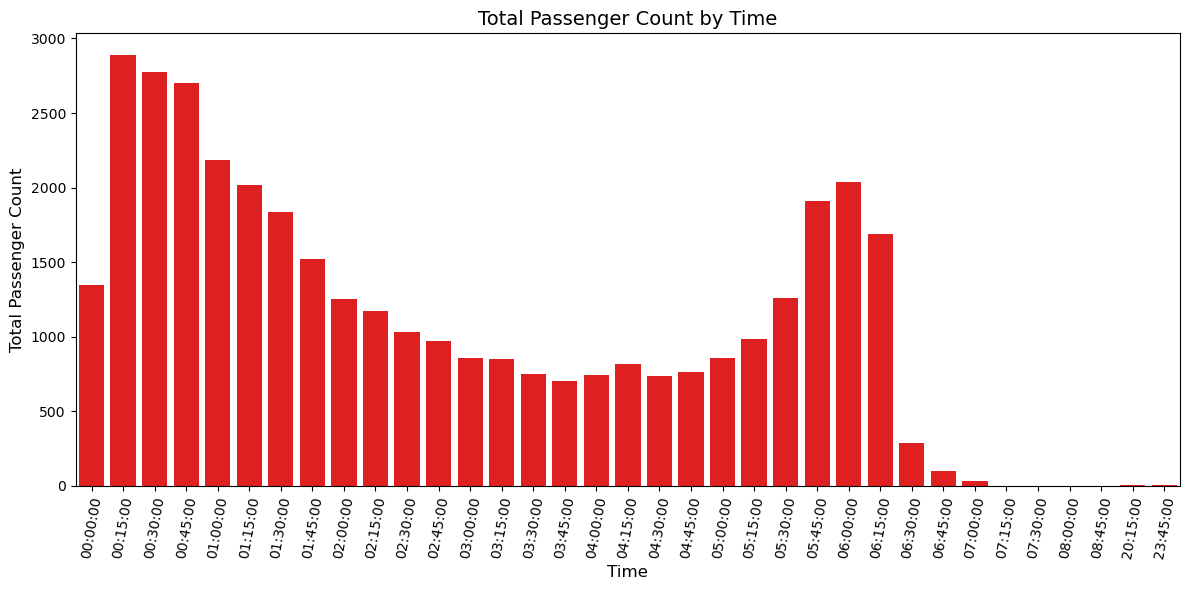

In [59]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_01_03, 
    color='red'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Add labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by 15 min Interval', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [24]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact

# Sample data preparation
pickup_summary_data_2016_01_03
time_intervals = pd.date_range(start='00:00', end='23:55', freq='5T')
pickup_summary_data_2016_01_03 = pd.DataFrame({
    'time': time_intervals,
    'total_passenger_count': np.random.randint(0, 50, len(time_intervals))
})

# Function to aggregate data based on time interval
def plot_dynamic_barplot(interval_minutes):

    df = pickup_summary_data_2016_01_03.copy()
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df['total_passenger_count'].resample(f'{interval_minutes}T').sum().reset_index()

    # Create bar plot
    fig = go.Figure()

    # Add bar trace
    fig.add_trace(go.Bar(
        x=df_resampled['time'].dt.strftime('%H:%M'),
        y=df_resampled['total_passenger_count'],
        text=df_resampled['total_passenger_count'],
        textposition='outside',  # Show text above bars
        marker=dict(color='red')
    ))

    # Update layout
    fig.update_layout(
        title=f'Total Passenger Count by Time ({interval_minutes}-Minute Intervals)',
        xaxis_title='Time',
        yaxis_title='Total Passenger Count',
        xaxis=dict(tickangle=45),  # Rotate x-axis labels
        template='plotly_white',
        height=600
    )

    # Show plot
    fig.show()

# Interactive slider
interact(plot_dynamic_barplot, interval_minutes=(5, 60, 5))


interactive(children=(IntSlider(value=30, description='interval_minutes', max=60, min=5, step=5), Output()), _…

<function __main__.plot_dynamic_barplot(interval_minutes)>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Sample data preparation (replace this with your dataset)
time_intervals = pd.date_range(start='00:00', end='23:55', freq='5T')
pickup_summary_data_2016_01_03 = pd.DataFrame({
    'time': time_intervals,
    'total_passenger_count': np.random.randint(0, 50, len(time_intervals))
})

# Function to create a dynamic bar plot
def plot_dynamic_barplot(interval_minutes):
    # Resample data
    df = pickup_summary_data_2016_01_03.copy()
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df['total_passenger_count'].resample(f'{interval_minutes}T').sum().reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(
        x=df_resampled['time'].dt.strftime('%H:%M'),
        height=df_resampled['total_passenger_count'],
        color='red'
    )

    # Add labels above each bar
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # X coordinate
            bar.get_height() + 1,  # Y coordinate (slightly above the bar)
            f'{int(bar.get_height())}',  # Text (count value)
            ha='center', va='bottom', fontsize=10
        )

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=80)

    # Add labels and title
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Total Passenger Count', fontsize=12)
    plt.title(f'Total Passenger Count by Time ({interval_minutes}-Minute Intervals)', fontsize=14)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Create an interactive slider
interact(plot_dynamic_barplot, interval_minutes=(5, 60, 5))


interactive(children=(IntSlider(value=30, description='interval_minutes', max=60, min=5, step=5), Output()), _…

<function __main__.plot_dynamic_barplot(interval_minutes)>

# data_2016_10_03(Thursday)

In [22]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_10_03['full_datetime'] = pd.to_datetime(data_2016_10_03['date'].astype(str) + ' ' + data_2016_10_03['time'].astype(str))

# Convert 'time_frame' to datetime format and extract only the time
data_2016_10_03['time'] = pd.to_datetime(data_2016_10_03['time'])
data_2016_10_03['separate_time'] = data_2016_10_03['time'].dt.time

# Create 15-minute time frames
data_2016_10_03['time'] = data_2016_10_03['full_datetime'].dt.floor('15T')

# Group by date and time_frame, calculate summary statistics
pickup_summary_data_2016_10_03_15_min = (
    data_2016_10_03.groupby(['date', 'time'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_10_03_15_min)

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_13676\425297506.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: <class 'datetime.time'> is not convertible to datetime

In [25]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_10_03['full_datetime'] = pd.to_datetime(data_2016_10_03['date'].astype(str) + ' ' + data_2016_10_03['time'].astype(str))

# Create 15-minute time frames
data_2016_10_03['time_frame'] = data_2016_10_03['full_datetime'].dt.floor('15T')

# Group by date and time_frame, calculate summary statistics
pickup_summary_data_2016_10_03_15_min = (
    data_2016_10_03.groupby(['date', 'time_frame'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_10_03_15_min)


         date          time_frame  total_passenger_count  \
0  2016-10-03 2016-10-03 00:00:00                     32   
1  2016-10-03 2016-10-03 06:30:00                      1   
2  2016-10-03 2016-10-03 06:45:00                      4   
3  2016-10-03 2016-10-03 07:00:00                    364   
4  2016-10-03 2016-10-03 07:15:00                   3316   
5  2016-10-03 2016-10-03 07:30:00                   4624   
6  2016-10-03 2016-10-03 07:45:00                   5780   
7  2016-10-03 2016-10-03 08:00:00                   5549   
8  2016-10-03 2016-10-03 08:15:00                   5827   
9  2016-10-03 2016-10-03 08:30:00                   5611   
10 2016-10-03 2016-10-03 08:45:00                   6001   
11 2016-10-03 2016-10-03 09:00:00                   6079   
12 2016-10-03 2016-10-03 09:15:00                   5602   
13 2016-10-03 2016-10-03 09:30:00                   5217   
14 2016-10-03 2016-10-03 09:45:00                   5651   
15 2016-10-03 2016-10-03 10:00:00       

In [28]:
print(data_2016_10_03.columns)


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'date', 'time',
       'full_datetime'],
      dtype='object')


In [40]:
pickup_summary_data_2016_10_03_15_min

,date,time_frame,time,total_passenger_count,median_pickup_longitude,median_pickup_latitude,total_trip_distance,total_amount
0,2016-10-03,2016-10-03 00:00:00,00:00:00,32,-73.923458,40.769064,141.38,605.43
1,2016-10-03,2016-10-03 06:30:00,06:37:00,1,-74.005104,40.718864,2.77,12.96
2,2016-10-03,2016-10-03 06:45:00,06:46:00,1,-73.981483,40.764221,0.30,6.36
3,2016-10-03,2016-10-03 06:45:00,06:47:00,2,-73.908352,40.775831,11.72,63.17
4,2016-10-03,2016-10-03 06:45:00,06:54:00,1,-73.986641,40.750999,8.90,32.34
...,...,...,...,...,...,...,...,...
518,2016-10-03,2016-10-03 16:00:00,16:03:00,2,-73.973396,40.763512,16.94,92.81
519,2016-10-03,2016-10-03 16:00:00,16:09:00,1,-73.784805,40.648594,17.51,58.34
520,2016-10-03,2016-10-03 16:00:00,16:12:00,1,-73.863464,40.769852,27.33,111.42
521,2016-10-03,2016-10-03 16:15:00,16:25:00,1,-73.981239,40.757992,55.01,205.84


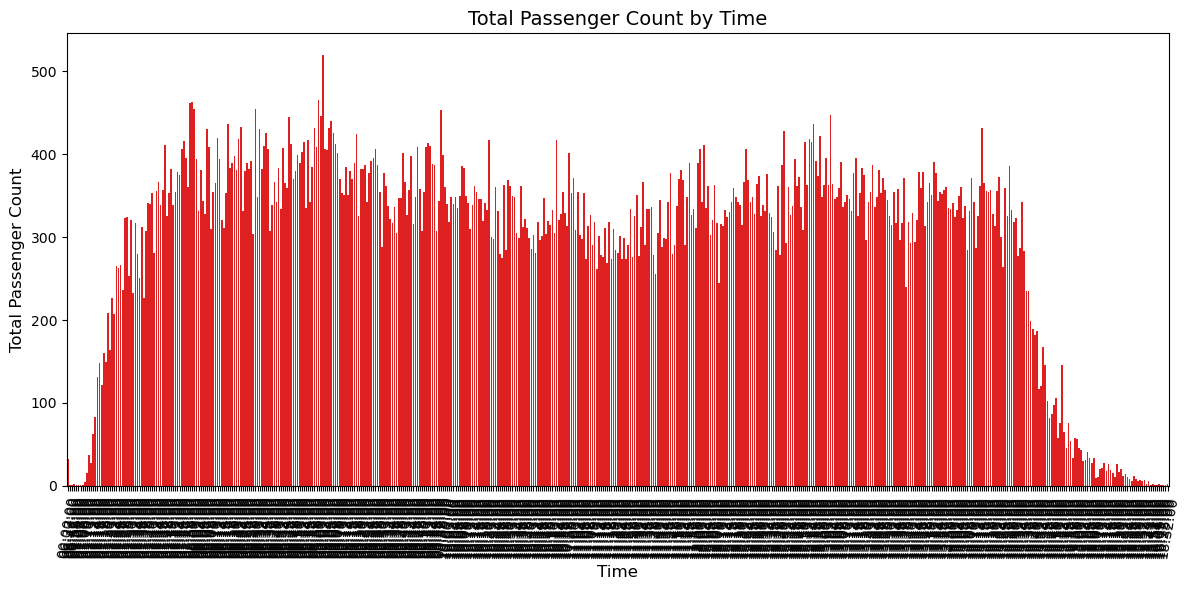

In [58]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_10_03_15_min, 
    color='red'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Add labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [26]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_10_03['full_datetime'] = pd.to_datetime(data_2016_10_03['date'].astype(str) + ' ' + data_2016_10_03['time'].astype(str))

# Create 1-hour time frames
data_2016_10_03['time_frame'] = data_2016_10_03['full_datetime'].dt.floor('1H')

# Separate the time component from the time_frame
data_2016_10_03['time'] = data_2016_10_03['time_frame'].dt.time

# Group by date and time_frame, calculate summary statistics
pickup_summary_data_2016_10_03_1_hr = (
    data_2016_10_03.groupby(['date', 'time_frame', 'time'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_10_03_1_hr)


         date          time_frame      time  total_passenger_count  \
0  2016-10-03 2016-10-03 00:00:00  00:00:00                     32   
1  2016-10-03 2016-10-03 06:00:00  06:00:00                      5   
2  2016-10-03 2016-10-03 07:00:00  07:00:00                  14084   
3  2016-10-03 2016-10-03 08:00:00  08:00:00                  22988   
4  2016-10-03 2016-10-03 09:00:00  09:00:00                  22549   
5  2016-10-03 2016-10-03 10:00:00  10:00:00                  19969   
6  2016-10-03 2016-10-03 11:00:00  11:00:00                  18860   
7  2016-10-03 2016-10-03 12:00:00  12:00:00                  21074   
8  2016-10-03 2016-10-03 13:00:00  13:00:00                  20945   
9  2016-10-03 2016-10-03 14:00:00  14:00:00                  14625   
10 2016-10-03 2016-10-03 15:00:00  15:00:00                    637   
11 2016-10-03 2016-10-03 16:00:00  16:00:00                      5   
12 2016-10-03 2016-10-03 18:00:00  18:00:00                      2   

    median_pickup_l

In [22]:
pickup_summary_data_2016_10_03_1_hr

,date,time_frame,time,total_passenger_count,median_pickup_longitude,median_pickup_latitude,total_trip_distance,total_amount
0,2016-10-03,2016-10-03 00:00:00,00:00:00,32,-73.923458,40.769064,141.38,605.43
1,2016-10-03,2016-10-03 06:00:00,06:00:00,5,-73.981483,40.764221,23.69,114.83
2,2016-10-03,2016-10-03 07:00:00,07:00:00,14084,-73.978401,40.757420,14637.19,85436.01
3,2016-10-03,2016-10-03 08:00:00,08:00:00,22988,-73.978806,40.756466,29342.26,169831.29
4,2016-10-03,2016-10-03 09:00:00,09:00:00,22549,-73.979507,40.755848,28997.59,173165.62
5,2016-10-03,2016-10-03 10:00:00,10:00:00,19969,-73.979637,40.756401,26234.00,155748.16
6,2016-10-03,2016-10-03 11:00:00,11:00:00,18860,-73.979607,40.756248,24992.05,148070.57
7,2016-10-03,2016-10-03 12:00:00,12:00:00,21074,-73.979111,40.756973,27104.42,164852.30
8,2016-10-03,2016-10-03 13:00:00,13:00:00,20945,-73.979729,40.756310,29754.89,173261.37
9,2016-10-03,2016-10-03 14:00:00,14:00:00,14625,-73.978844,40.755991,26596.15,144052.02


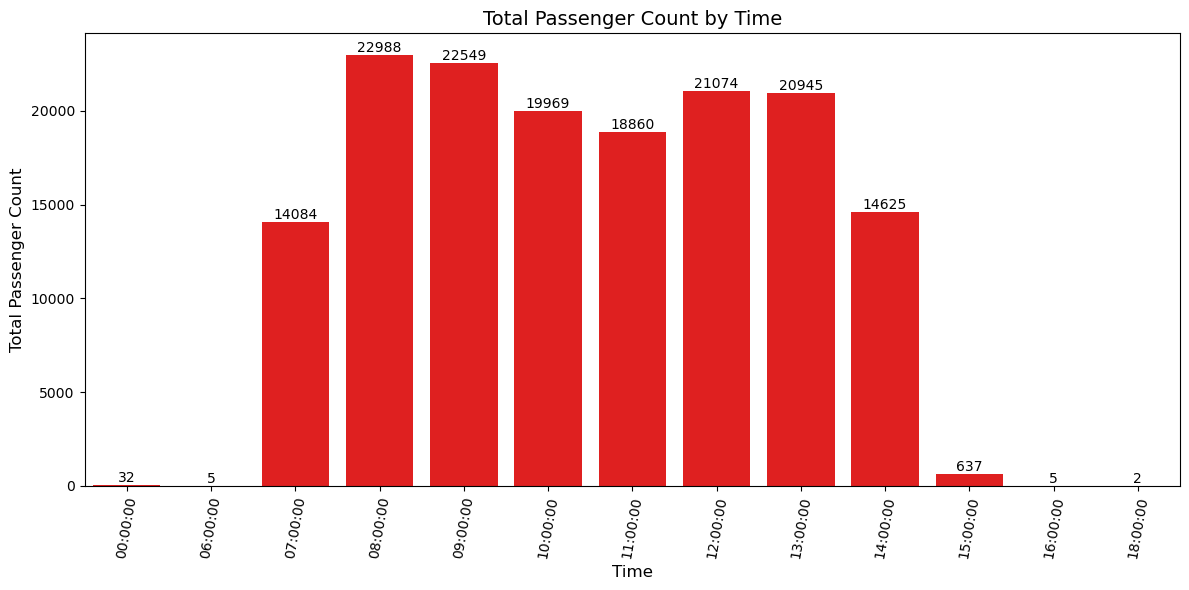

In [24]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_10_03_1_hr, 
    color='red'
)

# Annotate the bar plot with total passenger counts
for bar in ax.patches:
    # Get the height of the bar
    bar_height = bar.get_height()
    if bar_height > 0:  # To avoid displaying labels for zero-height bars
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate of the text
            bar_height,                        # Y-coordinate of the text
            f'{int(bar_height)}',              # Text (convert to integer for clean display)
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            fontsize=10,                       # Font size
            color='black'                      # Text color
        )

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Add labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [27]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact

# Sample data preparation (replace this with your dataset)
pickup_summary_data_2016_10_03_15_min
time_intervals = pd.date_range(start='00:00', end='23:55', freq='5T')
pickup_summary_data_2016_10_03_15_min = pd.DataFrame({
    'time': time_intervals,
    'total_passenger_count': np.random.randint(0, 50, len(time_intervals))
})

# Function to aggregate data based on time interval
def plot_dynamic_barplot(interval_minutes):
    # Resample data
    df = pickup_summary_data_2016_10_03_15_min.copy()
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df['total_passenger_count'].resample(f'{interval_minutes}T').sum().reset_index()

    # Create bar plot
    fig = go.Figure()

    # Add bar trace
    fig.add_trace(go.Bar(
        x=df_resampled['time'].dt.strftime('%H:%M'),
        y=df_resampled['total_passenger_count'],
        text=df_resampled['total_passenger_count'],
        textposition='outside',  # Show text above bars
        marker=dict(color='red')
    ))

    # Update layout
    fig.update_layout(
        title=f'Total Passenger Count by Time ({interval_minutes}-Minute Intervals)',
        xaxis_title='Time',
        yaxis_title='Total Passenger Count',
        xaxis=dict(tickangle=45),  # Rotate x-axis labels
        template='plotly_white',
        height=600
    )

    # Show plot
    fig.show()

# Interactive slider
interact(plot_dynamic_barplot, interval_minutes=(5, 60, 5))


interactive(children=(IntSlider(value=30, description='interval_minutes', max=60, min=5, step=5), Output()), _…

<function __main__.plot_dynamic_barplot(interval_minutes)>

show slot numbers 

# data_2016_11_03(Friday)

In [28]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_11_03['full_datetime'] = pd.to_datetime(data_2016_11_03['date'].astype(str) + ' ' + data_2016_11_03['time'].astype(str))

# Convert 'time_frame' to datetime format and extract only the time
data_2016_11_03['time_frame'] = pd.to_datetime(data_2016_11_03['time_frame'])
data_2016_11_03['separate_time'] = data_2016_11_03['time_frame'].dt.time

# Create 15-minute time frames
data_2016_11_03['time_frame'] = data_2016_11_03['full_datetime'].dt.floor('15T')

# Group by date and time_frame, calculate summary statistics
pickup_summary_data_2016_11_03_15_min = (
    data_2016_11_03.groupby(['date', 'time_frame','time'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_11_03_15_min)

          date          time_frame      time  total_passenger_count  \
0   2016-01-03 2016-01-03 00:15:00  00:16:00                      1   
1   2016-01-03 2016-01-03 00:15:00  00:26:00                      1   
2   2016-01-03 2016-01-03 00:15:00  00:27:00                      1   
3   2016-01-03 2016-01-03 00:30:00  00:30:00                      1   
4   2016-01-03 2016-01-03 00:30:00  00:34:00                      1   
..         ...                 ...       ...                    ...   
139 2016-10-03 2016-10-03 14:15:00  14:27:00                      1   
140 2016-10-03 2016-10-03 14:15:00  14:28:00                      2   
141 2016-10-03 2016-10-03 14:30:00  14:31:00                      1   
142 2016-10-03 2016-10-03 14:30:00  14:42:00                      5   
143 2016-10-03 2016-10-03 14:45:00  14:54:00                      1   

     median_pickup_longitude  median_pickup_latitude  total_trip_distance  \
0                 -73.870789               40.773788                 9

In [29]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_11_03['full_datetime'] = pd.to_datetime(data_2016_11_03['date'].astype(str) + ' ' + data_2016_11_03['time'].astype(str))

# Create 1-hour time frames
data_2016_11_03['time_frame'] = data_2016_11_03['full_datetime'].dt.floor('1H')

# Separate the time component from the time_frame
data_2016_11_03['time'] = data_2016_11_03['time_frame'].dt.time

# Group by date and time_frame, calculate summary statistics
pickup_summary_data_2016_11_03_1_hr = (
    data_2016_11_03.groupby(['date', 'time_frame', 'time'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_11_03_1_hr)


         date          time_frame      time  total_passenger_count  \
0  2016-01-03 2016-01-03 00:00:00  00:00:00                     17   
1  2016-01-03 2016-01-03 01:00:00  01:00:00                     21   
2  2016-01-03 2016-01-03 02:00:00  02:00:00                     16   
3  2016-01-03 2016-01-03 03:00:00  03:00:00                      6   
4  2016-01-03 2016-01-03 04:00:00  04:00:00                      8   
5  2016-01-03 2016-01-03 05:00:00  05:00:00                     12   
6  2016-01-03 2016-01-03 06:00:00  06:00:00                      5   
7  2016-10-03 2016-10-03 07:00:00  07:00:00                     17   
8  2016-10-03 2016-10-03 08:00:00  08:00:00                     39   
9  2016-10-03 2016-10-03 09:00:00  09:00:00                     54   
10 2016-10-03 2016-10-03 10:00:00  10:00:00                     21   
11 2016-10-03 2016-10-03 11:00:00  11:00:00                     24   
12 2016-10-03 2016-10-03 12:00:00  12:00:00                     16   
13 2016-10-03 2016-1

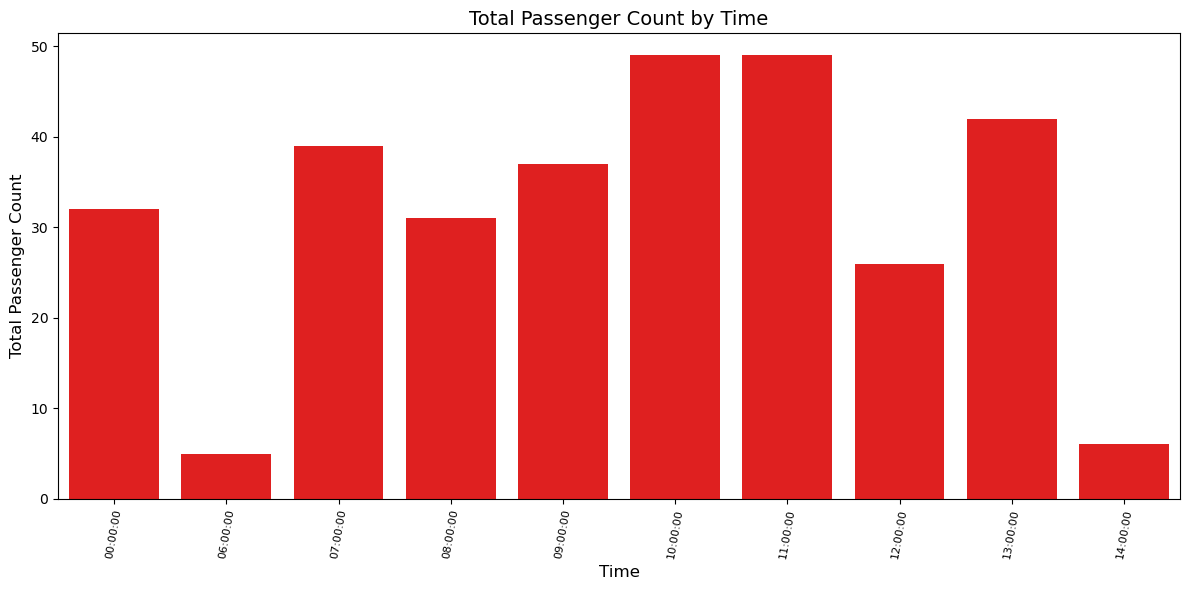

In [56]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_11_03_1_hr, 
    color='red'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=80, fontsize=8)  # Adjust the font size of x-axis labels

# Add labels and title with correct font sizes
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [47]:
pickup_summary_data_2016_11_03_1_hr

,date,time_frame,time,total_passenger_count,median_pickup_longitude,median_pickup_latitude,total_trip_distance,total_amount
0,2016-10-03,2016-10-03 00:00:00,00:00:00,32,-73.923458,40.769064,141.38,605.43
1,2016-10-03,2016-10-03 06:00:00,06:00:00,5,-73.981483,40.764221,23.69,114.83
2,2016-10-03,2016-10-03 07:00:00,07:00:00,39,-73.981064,40.746815,48.93,321.72
3,2016-10-03,2016-10-03 08:00:00,08:00:00,31,-73.981201,40.752701,62.81,346.27
4,2016-10-03,2016-10-03 09:00:00,09:00:00,37,-73.979565,40.764286,50.53,313.77
5,2016-10-03,2016-10-03 10:00:00,10:00:00,49,-73.975109,40.762640,84.52,454.11
6,2016-10-03,2016-10-03 11:00:00,11:00:00,49,-73.977470,40.757095,57.58,323.37
7,2016-10-03,2016-10-03 12:00:00,12:00:00,26,-73.983784,40.750614,29.35,189.54
8,2016-10-03,2016-10-03 13:00:00,13:00:00,42,-73.981369,40.753014,48.79,276.90
9,2016-10-03,2016-10-03 14:00:00,14:00:00,6,-73.980431,40.763699,22.95,90.54


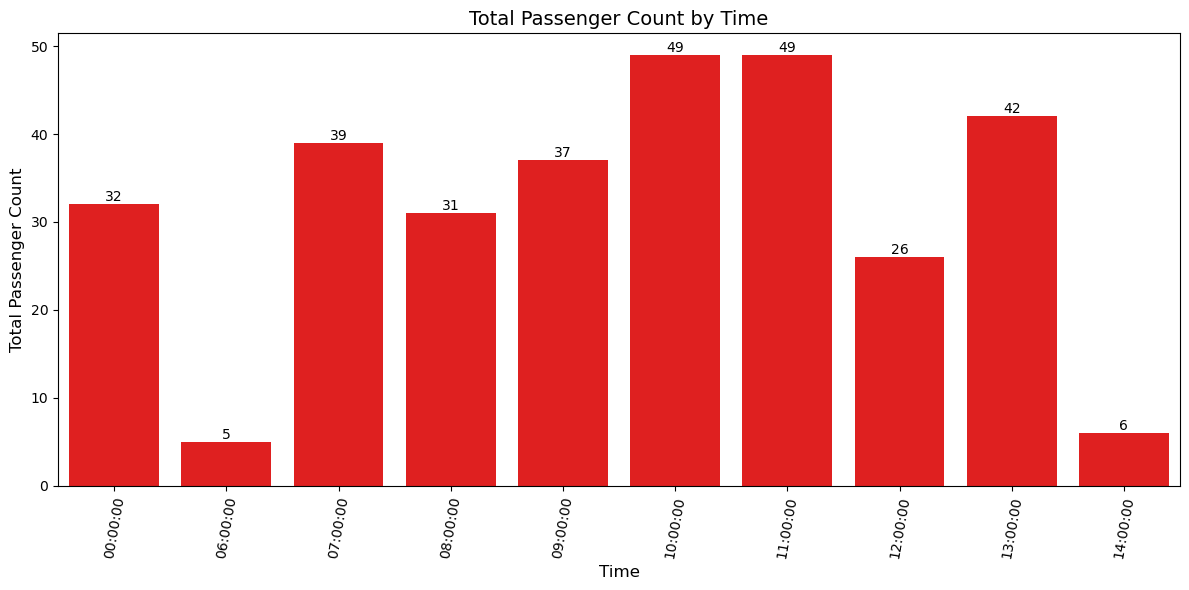

In [58]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_11_03, 
    color='red'
)

# Annotate the bar plot with total passenger counts
for bar in ax.patches:
    # Get the height of the bar
    bar_height = bar.get_height()
    if bar_height > 0:  # To avoid displaying labels for zero-height bars
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate of the text
            bar_height,                        # Y-coordinate of the text
            f'{int(bar_height)}',              # Text (convert to integer for clean display)
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            fontsize=10,                       # Font size
            color='black'                      # Text color
        )

# Rotate x-axis labels for better readability
plt.xticks(rotation=80)

# Add labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


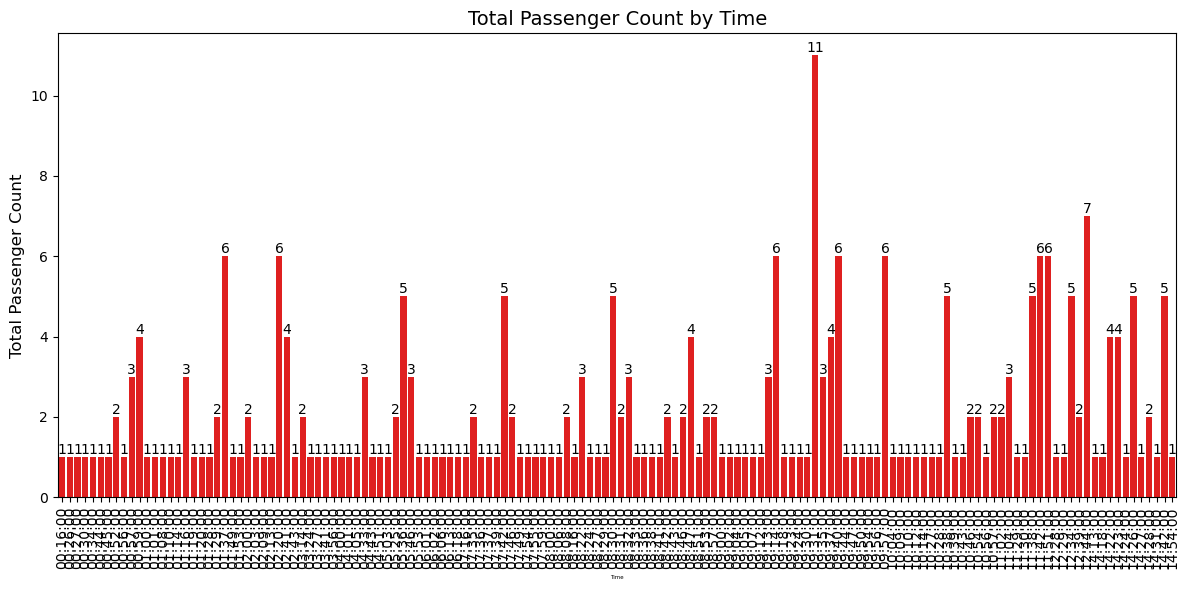

In [31]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_11_03, 
    color='red'
)

# Annotate the bar plot with total passenger counts
for bar in ax.patches:
    # Get the height of the bar
    bar_height = bar.get_height()
    if bar_height > 0:  # To avoid displaying labels for zero-height bars
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate of the text
            bar_height,                        # Y-coordinate of the text
            f'{int(bar_height)}',              # Text (convert to integer for clean display)
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            fontsize=10,                       # Font size
            color='black'                      # Text color
        )

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Time', fontsize=4)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [30]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact

# Sample data preparation (replace this with your dataset)
pickup_summary_data_2016_11_03_15_min
time_intervals = pd.date_range(start='00:00', end='23:55', freq='5T')
pickup_summary_data_2016_11_03_15_min = pd.DataFrame({
    'time': time_intervals,
    'total_passenger_count': np.random.randint(0, 50, len(time_intervals))
})

# Function to aggregate data based on time interval
def plot_dynamic_barplot(interval_minutes):
    # Resample data
    df = pickup_summary_data_2016_11_03_15_min.copy()
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df['total_passenger_count'].resample(f'{interval_minutes}T').sum().reset_index()

    # Create bar plot
    fig = go.Figure()

    # Add bar trace
    fig.add_trace(go.Bar(
        x=df_resampled['time'].dt.strftime('%H:%M'),
        y=df_resampled['total_passenger_count'],
        text=df_resampled['total_passenger_count'],
        textposition='outside',  # Show text above bars
        marker=dict(color='red')
    ))

    # Update layout
    fig.update_layout(
        title=f'Total Passenger Count by Time ({interval_minutes}-Minute Intervals)',
        xaxis_title='Time',
        yaxis_title='Total Passenger Count',
        xaxis=dict(tickangle=45),  # Rotate x-axis labels
        template='plotly_white',
        height=600
    )

    # Show plot
    fig.show()

# Interactive slider
interact(plot_dynamic_barplot, interval_minutes=(5, 60, 5))


interactive(children=(IntSlider(value=30, description='interval_minutes', max=60, min=5, step=5), Output()), _…

<function __main__.plot_dynamic_barplot(interval_minutes)>

Text size kamm karnah hai 

# How many taxi are required at particulat median locations(median_latt, median_long)

## If there are multiple taxi request from a median location in a 15 minute slot, how to handle those requests??
### How many taxi are required near the median locations . so that a cab can reach customer in the minimum amount of time?? If time to reach customer destination is large (>15 mins),customer may be anxious or may cancel trip ?? -- revenue loss 

## range of latitude and range of latitude (min , max)

# data_2016_02_03(Wednesday)

In [31]:
# Combine 'date' and 'time' to create a full datetime column
data_2016_02_03['full_datetime'] = pd.to_datetime(data_2016_02_03['date'].astype(str) + ' ' + data_2016_02_03['time'].astype(str))

# Create 15-minute time frames
data_2016_02_03['time_frame'] = data_2016_02_03['full_datetime'].dt.floor('15T')

# Extract separate 'time' and 'date' columns for clarity
data_2016_02_03['time'] = data_2016_02_03['time_frame'].dt.time
data_2016_02_03['date'] = data_2016_02_03['time_frame'].dt.date

# Group by 'date' and 'time_frame', calculate summary statistics
pickup_summary_data_2016_02_03 = (
    data_2016_02_03.groupby(['date', 'time'])
    .agg(
        total_passenger_count=('passenger_count', 'sum'),
        median_pickup_longitude=('pickup_longitude', 'median'),  # Median of pickup longitude
        median_pickup_latitude=('pickup_latitude', 'median'),    # Median of pickup latitude
        total_trip_distance=('trip_distance', 'sum'),           # Sum of trip distances in each time frame
        total_amount=('total_amount', 'sum')                    # Sum of total amounts in each time frame
    )
    .reset_index()
)

# Print the summary
print(pickup_summary_data_2016_02_03)

          date      time  total_passenger_count  median_pickup_longitude  \
0   2016-02-03  00:00:00                     24               -73.975002   
1   2016-02-03  00:15:00                      1               -73.994186   
2   2016-02-03  00:30:00                      1               -74.008232   
3   2016-02-03  00:45:00                      2               -73.993198   
4   2016-02-03  01:00:00                      1               -73.962166   
5   2016-02-03  01:45:00                      1               -74.002480   
6   2016-02-03  02:00:00                      1               -74.002029   
7   2016-02-03  02:30:00                      1               -73.987839   
8   2016-02-03  03:45:00                      1               -73.929840   
9   2016-02-03  04:00:00                      2               -74.005028   
10  2016-02-03  04:45:00                      3               -73.980015   
11  2016-02-03  05:00:00                      2               -73.976974   
12  2016-02-

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\1435495900.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\1435495900.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sanjoy\AppData\Local\Temp\ipykernel_6016\1435495900.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [53]:
pickup_summary_data_2016_02_03

,date,time,total_passenger_count,median_pickup_longitude,median_pickup_latitude,total_trip_distance,total_amount
0,2016-02-03,00:00:00,24,-73.975002,40.745703,55.53,222.55
1,2016-02-03,00:15:00,1,-73.994186,40.738789,2.30,10.80
2,2016-02-03,00:30:00,1,-74.008232,40.741253,0.65,5.30
3,2016-02-03,00:45:00,2,-73.993198,40.738693,2.34,16.56
4,2016-02-03,01:00:00,1,-73.962166,40.760437,2.14,11.88
5,2016-02-03,01:45:00,1,-74.002480,40.733379,2.36,10.80
6,2016-02-03,02:00:00,1,-74.002029,40.715256,2.85,14.80
7,2016-02-03,02:30:00,1,-73.987839,40.749619,1.19,7.14
8,2016-02-03,03:45:00,1,-73.929840,40.756527,7.01,27.88
9,2016-02-03,04:00:00,2,-74.005028,40.737541,10.73,46.61


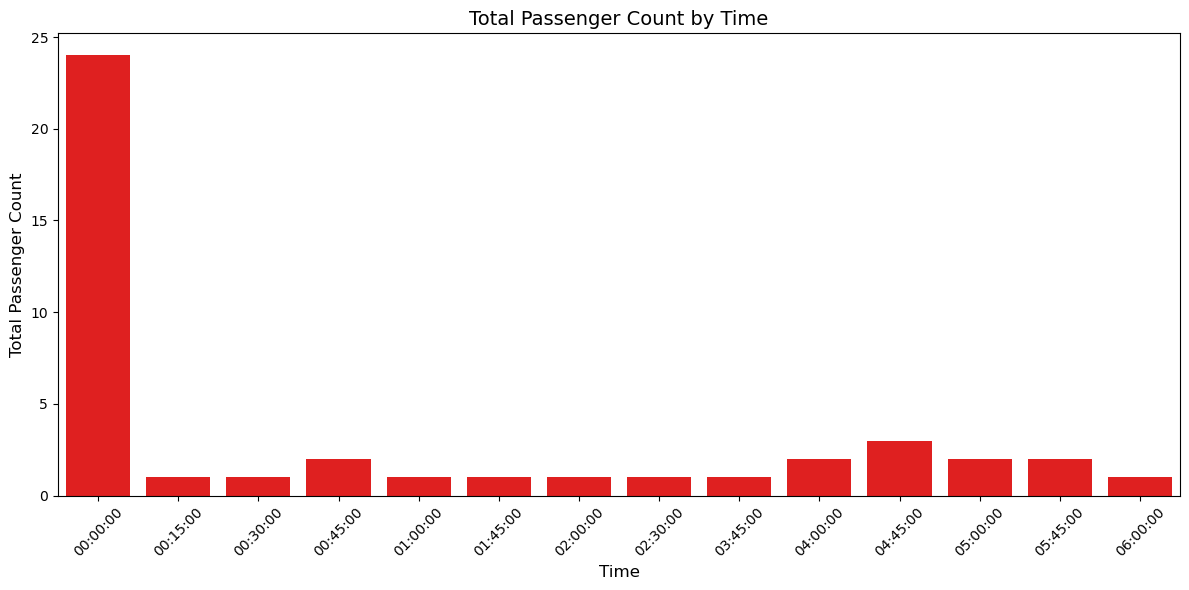

In [56]:
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_02_03, 
    color='red'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

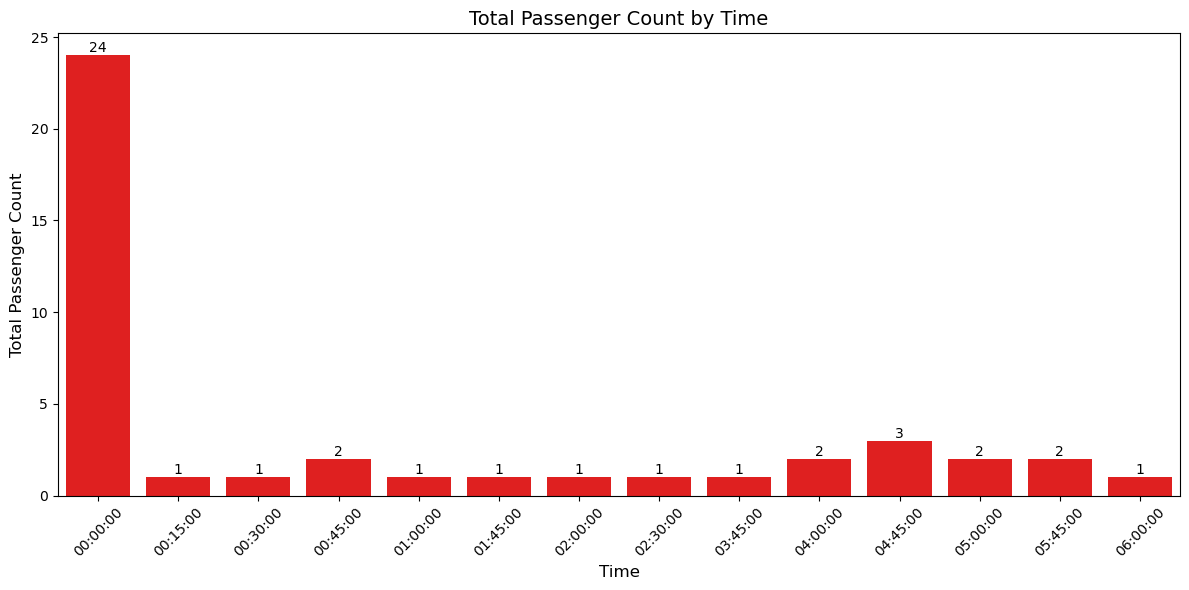

In [52]:
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(
    x='time', 
    y='total_passenger_count', 
    data=pickup_summary_data_2016_02_03, 
    color='red'
)

# Annotate the bar plot with total passenger counts
for bar in ax.patches:
    # Get the height of the bar
    bar_height = bar.get_height()
    if bar_height > 0:  # To avoid displaying labels for zero-height bars
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate of the text
            bar_height,                        # Y-coordinate of the text
            f'{int(bar_height)}',              # Text (convert to integer for clean display)
            ha='center',                       # Horizontal alignment
            va='bottom',                       # Vertical alignment
            fontsize=10,                       # Font size
            color='black'                      # Text color
        )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Time', fontsize=12)
plt.ylabel('Total Passenger Count', fontsize=12)
plt.title('Total Passenger Count by Time', fontsize=14)

# Display the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


In [32]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact


pickup_summary_data_2016_02_03
time_intervals = pd.date_range(start='00:00', end='23:55', freq='5T')
pickup_summary_data_2016_02_03 = pd.DataFrame({
    'time': time_intervals,
    'total_passenger_count': np.random.randint(0, 50, len(time_intervals))
})

# Function to aggregate data based on time interval
def plot_dynamic_barplot(interval_minutes):
    # Resample data
    df = pickup_summary_data_2016_02_03.copy()
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    df_resampled = df['total_passenger_count'].resample(f'{interval_minutes}T').sum().reset_index()

    # Create bar plot
    fig = go.Figure()

    # Add bar trace
    fig.add_trace(go.Bar(
        x=df_resampled['time'].dt.strftime('%H:%M'),
        y=df_resampled['total_passenger_count'],
        text=df_resampled['total_passenger_count'],
        textposition='outside',  # Show text above bars
        marker=dict(color='red')
    ))

    # Update layout
    fig.update_layout(
        title=f'Total Passenger Count by Time ({interval_minutes}-Minute Intervals)',
        xaxis_title='Time',
        yaxis_title='Total Passenger Count',
        xaxis=dict(tickangle=45),  # Rotate x-axis labels
        template='plotly_white',
        height=600
    )

    # Show plot
    fig.show()

# Interactive slider
interact(plot_dynamic_barplot, interval_minutes=(5, 60, 5))


interactive(children=(IntSlider(value=30, description='interval_minutes', max=60, min=5, step=5), Output()), _…

<function __main__.plot_dynamic_barplot(interval_minutes)>

In [58]:
print(taxi_data.corr())

                       VendorID  passenger_count  trip_distance  \
VendorID               1.000000         0.176117      -0.077696   
passenger_count        0.176117         1.000000      -0.016795   
trip_distance         -0.077696        -0.016795       1.000000   
pickup_longitude      -0.025754        -0.003019      -0.012553   
pickup_latitude        0.026333         0.003171       0.013158   
RatecodeID            -0.029439        -0.018723       0.409197   
dropoff_longitude     -0.024983        -0.002742      -0.011187   
dropoff_latitude       0.024801         0.002721       0.011907   
payment_type          -0.058178        -0.008660      -0.069641   
fare_amount           -0.020604        -0.010090       0.892986   
extra                 -0.595922        -0.097992       0.068782   
mta_tax                0.016772         0.008736      -0.106126   
tip_amount             0.008747        -0.002748       0.576482   
tolls_amount           0.006171        -0.002484       0.64310

In [59]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

# OLS Regression 

In [13]:
num_cols = [3,4,5,6,7,9,10,13,14,15,16,17] ## apply index numbers of numeric variables from df.info as features

features = taxi_data[taxi_data.columns[num_cols]]
type(features)  # check type of object created - it sis also a dataframe
features.head() # check
features = sm.add_constant(features)  # adding a_0

In [14]:
fare =  taxi_data[taxi_data.columns[12]]
fare
type(fare)  # when one column is extrcated fm a dataframe, a series is returned.
taxi_data_linear_model = sm.OLS(fare, features) # Ordinary Least Squares (OLS)
taxi_data_result = taxi_data_linear_model.fit()

In [15]:
# dir(taxi_data_result) # shows associated methods with this result object
print(taxi_data_result.summary())  

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 4.632e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:06:56   Log-Likelihood:            -2.9369e+05
No. Observations:              100000   AIC:                         5.874e+05
Df Residuals:                   99987   BIC:                         5.875e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.04

In [16]:
dir(taxi_data_result)
print(taxi_data_result.summary2())

                     Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.848      
Dependent Variable:    fare_amount       AIC:                 587397.7515
Date:                  2024-11-24 23:07  BIC:                 587521.4195
No. Observations:      100000            Log-Likelihood:      -2.9369e+05
Df Model:              12                F-statistic:         4.632e+04  
Df Residuals:          99987             Prob (F-statistic):  0.00       
R-squared:             0.848             Scale:               20.821     
-------------------------------------------------------------------------
                       Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
-------------------------------------------------------------------------
const                  -5.0452   0.3171 -15.9086 0.0000  -5.6668  -4.4236
passenger_count         0.0097   0.0091   1.0579 0.2901  -0.0082   0.0275
trip_distance           2.3920   0.0056 425.0244 0.0000   2

In [17]:
print(f"The first thing to examine in the output is  Prob (F-Statistic) \n We need to ask: Is it less than 0.05 ?  \n Here it appears as : {taxi_data_result.f_pvalue:,.2f} \n Hence the model's Adj R-Square {taxi_data_result.rsquared_adj:,.2f} is statistically significant")

The first thing to examine in the output is  Prob (F-Statistic) 
 We need to ask: Is it less than 0.05 ?  
 Here it appears as : 0.00 
 Hence the model's Adj R-Square 0.85 is statistically significant


In [18]:
type(taxi_data_linear_model.fit()) # this is a wrapper object


print(str(taxi_data_result.summary())) # to print regression model neatly
# dir(taxi_data_result) This shows what methods are available without referring to py docs or PyPi

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 4.632e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:07:28   Log-Likelihood:            -2.9369e+05
No. Observations:              100000   AIC:                         5.874e+05
Df Residuals:                   99987   BIC:                         5.875e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.04

In [19]:
print(f'Model Fit is assessed \n using Adjusted R Squared {100*taxi_data_result.rsquared.round(4)} %')
taxi_data_ols_coeff = taxi_data_result.params.round(2).copy()

taxi_data_ols_coeff
taxi_data_ols_coeff = taxi_data_ols_coeff[1:] # drop const or intercept value wwith index 0
print('----------')
print('Coeff     Values')
print('-----     ------')
print(taxi_data_ols_coeff)

Model Fit is assessed 
 using Adjusted R Squared 84.75 %
----------
Coeff     Values
-----     ------
passenger_count           0.01
trip_distance             2.39
pickup_longitude         -0.13
pickup_latitude          -0.17
RatecodeID                6.47
dropoff_longitude         0.38
dropoff_latitude          0.60
extra                    -3.53
mta_tax                 -22.58
tip_amount                0.41
tolls_amount             -0.22
improvement_surcharge    55.48
dtype: float64


In [20]:
taxi_data_result.conf_int(alpha = 0.05).round(2)

,0,1
const,-5.67,-4.42
passenger_count,-0.01,0.03
trip_distance,2.38,2.40
pickup_longitude,-0.26,-0.00
pickup_latitude,-0.40,0.06
RatecodeID,6.33,6.62
dropoff_longitude,0.23,0.54
dropoff_latitude,0.32,0.88
extra,-3.67,-3.38
mta_tax,-23.73,-21.44


In [21]:
taxi_data_result.ess.sum() + taxi_data_result.resid.sum()

11573279.620580472

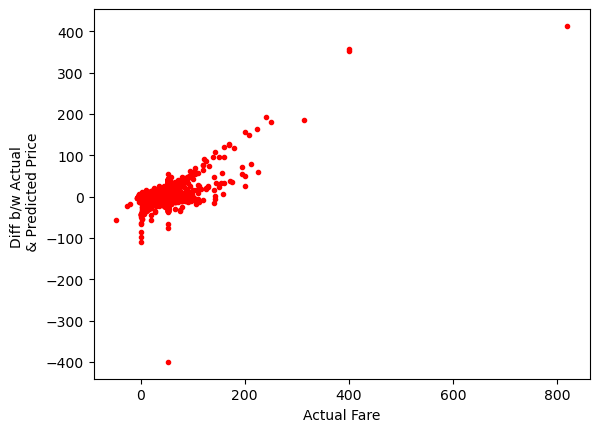

In [22]:
plt.plot(taxi_data.fare_amount, taxi_data_result.resid,'.r') 
plt.xlabel("Actual Fare")
plt.ylabel( "Diff b/w Actual \n & Predicted Fare")
plt.show()

In [23]:
taxi_data_result.resid

0       -1.385854
1       -0.746923
2       -0.125933
3        0.023719
4       -0.885933
           ...   
99995   -1.529312
99996   -0.306455
99997   -2.002751
99998   -0.844012
99999   -1.734828
Length: 100000, dtype: float64

# Boxplot of fare_amount , total amount, trip_distance
